# Transient Arctic modeling

## Model configuration - Processes considered

<img src='image/fullxml.png' width='768' height='200' alt='transient configuration' align='center' />

## Column model



|Soil layer                                                        |Peat|Mineral|Bedrock|
|:-----------------------------------------------------------------|:--:|:--:|:-----:|
|Depth from surface                                                         |0.3 m |20 m |40 m  |
|Cell size                                                         |0.01 m |0.01 m |0.01 m  |
|Porosity                                                          |6.3739496E-01 |4.8103077E-01|0.3 |
|Permeability ($\mathrm{m}^2$)                                     |1e-07|1e-08|1e-09|
|Van Genuchten $\alpha$ (Pa$^{-1}$)                                |1.0000000E-02|1.8249144E-03|0.03|
|Van Genuchten n                                                   |2.0500000E+00|2.0500000E+00|2|
|Residual saturation                                               |2.2432414E-01|1.5948806E-01|0.05|
|Thermal conductivity, unfrozen ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)|4.3957661E-01|9.5210506E-01|1|
|Thermal conductivity, dry ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)     |1.0102341E-01|9.8440543E-01|0.29|



## Model setup – initialization

freeze.xml
* The purpose is to freeze a soil column from bottom to top to obtain an initial frozen soil domain.
* The freeze-up model has the same configuration with demo 1.
* Initial water table depth = -5.78m
* Run for a long time to reach steady state (1000 years)
* Obtain the final pressure and temperature profile using ATS tool **column_data.py**

- <font color='red'>Do we conduct a similar spin-up process?</font>

## Model setup – transient 

* cycle driver
  - Basic configuration
  - Run for 1 year
* subsurface flow
  - Initial condition: hydrostatic head = -1 m (Original - from freezeup)
  - Boundary condition: J$_\mathrm{w}$ = 0 [Neumann boundary - No hydraulic flow at the surfaces - Prep and Evap. is going to be added using SEB]
* surface flow
  - Initial condition: from subsurface
  - Boundary condition: outlet at surface; (if hillslope, would be possible define the lower side as outlet)
* subsurface energy
  - Initial condition: T = 270.15 K
  - Boundary condition: J$_\mathrm{e}$ = 0
* surface energy
  - Initial condition: from subsurface
  - Boundary condition: J$_\mathrm{e}$ = 0
* SEB
  - Initial condition: snow depth, could be from the last step of spinup (We need to rethink this value - Can we assign the value from Yakou data?

## SEB conditions 

- **SEB with Snow considered - Daily data considered**
- Surface-air_temperature 
- Surface-incoming_shortwave_radiation 
- Surface-relative_humidity 
- Surface precipitation_rain
- Surface-snow-precipitation: This data needs to be rethought - As it is taking greater simulation time. Actual data, constant data (from 50 - 200 days),... have been tried.  

- Land cover types (Rethink the values - Is it fix?): Dessicated zone thickness (m) = 0.1 m, Roughness length of bare ground (m) = 0.04, Roughness length of snow (m) = 0.004, Snow transition depth (m) = 0.02, Water transition depth (m) = 0.001, albedo of bare ground (-) = 0.135, Emissivity of bare ground (-) = 0.92.

- Do we need to define minimum wind speed? - Check out: https://amanzi.github.io/ats/input_spec/ATSNativeSpec_1_1.html#id168

## Observation

We add **observation** in this model input file.
It is used for collecting some specific modeled results (variables/parameters) 
probably at some specific locations with time. Locations are defined in **region**.  

* Observations points considered: 0.01, 0.04, 0.2, 0.4, 0.8, 1.2, 6, 5.0, 10.0, 20.0, 30.0, 40.0 m & surface outlet (Region: boundary - It includes all the entities on the boundary face! - How is it defined?).

# Model observation

In [1]:
%matplotlib inline
import sys, os
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import sys,os
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

In [3]:
import os
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [4]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colors
import matplotlib.cm
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [5]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data.head()

Soil moisture at - 0.04 m (%)  Soil moisture at - 0.1 m (%)  \
TIMESTAMP                                                                 
2016-01-01                       7.897694                      7.523868   
2016-01-02                       7.991826                      7.594250   
2016-01-03                       7.992500                      7.606875   
2016-01-04                       7.960069                      7.581465   
2016-01-05                       7.913792                      7.539000   

            Soil moisture at - 0.2 m (%)  Soil moisture at - 0.4 m (%)  \
TIMESTAMP                                                                
2016-01-01                      8.694236                      9.016111   
2016-01-02                      8.745417                      9.012639   
2016-01-03                      8.766806                      9.033472   
2016-01-04                      8.749236                      9.025833   
2016-01-05                      8.703056                      8.995694   

            Soil moisture at - 0.8 m (%)  Soil moisture at - 1.2 m (%)  \
TIMESTAMP                                                                
2016-01-01                      5.368792                      4.093549   
2016-01-02                      5.350889                      4.060958   
2016-01-03                      5.342833                      4.033590   
2016-01-04                      5.336757                      4.012583   
2016-01-05                      5.324597                      3.993715   

            Soil moisture at - 1.6 m (%)  Soil temperature at - 0.00 m (°C)  \
TIMESTAMP                                                                     
2016-01-01                      6.058042                         -13.103958   
2016-01-02                      6.008417                         -12.255417   
2016-01-03                      5.962187                         -12.737500   
2016-01-04                      5.923819                         -13.006597   
2016-01-05                      5.892174                         -13.525278   

            Soil temperature at - 0.04 m (°C)  \
TIMESTAMP                                       
2016-01-01                         -12.507847   
2016-01-02                         -11.861597   
2016-01-03                         -11.824514   
2016-01-04                         -11.997847   
2016-01-05                         -12.371597   

            Soil temperature at - 0.1 m (°C)  \
TIMESTAMP                                      
2016-01-01                        -11.848819   
2016-01-02                        -11.342569   
2016-01-03                        -11.200694   
2016-01-04                        -11.365486   
2016-01-05                        -11.691181   

            Soil temperature at - 0.2 m (°C)  \
TIMESTAMP                                      
2016-01-01                        -11.295486   
2016-01-02                        -10.947708   
2016-01-03                        -10.765278   
2016-01-04                        -10.867778   
2016-01-05                        -11.171181   

            Soil temperature at - 0.4 m (°C)  \
TIMESTAMP                                      
2016-01-01                         -9.824722   
2016-01-02                         -9.781389   
2016-01-03                         -9.618403   
2016-01-04                         -9.648889   
2016-01-05                         -9.829653   

            Soil temperature at - 0.8 m (°C)  \
TIMESTAMP                                      
2016-01-01                         -7.814958   
2016-01-02                         -7.936854   
2016-01-03                         -7.946111   
2016-01-04                         -7.977951   
2016-01-05                         -8.078194   

            Soil temperature at - 1.2 m (°C)  Soil temperature at - 1.6 m (°C)  
TIMESTAMP                                                                       
2016-01-01                         -4.87

In [6]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2016-01-01    260.642153
2016-01-02    261.288403
2016-01-03    261.325486
2016-01-04    261.152153
2016-01-05    260.778403
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [7]:
Yakou_measured_data.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='TIMESTAMP', length=1096)

In [8]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat = 6.3739496E-01

poro_mineral = 4.8103077E-01

for i, depth in enumerate(depths):
    if depth < depth_peat:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Our data

In [9]:
z = np.arange(0,365)
len(z)

365

In [10]:
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_InputData_4yrs/Calib_data_2016_2018.h5','r') as hdf:
    # List of variables - copied from AWS_final_metdata_4yrs_concise
    ls = ['air temperature [K]', 'Soil temperature at - 0.00 m [K]',
       'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]',
       'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)',
       'precipitation snow [m SWE s^-1]_sd0.1',
       'precipitation snow [m SWE s^-1]_sd0.2',
       'precipitation snow [m SWE s^-1]_sd0.45',
       'precipitation snow [m SWE s^-1]_sd0.04',
       'precipitation snow [m SWE s^-1]_sd0.01']
    print(ls)
    #air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    #print(air_temp_smoothened)
    z = np.arange(0,1096)
    data_input = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        data_input[f'{i}'] = np.array(hdf.get(f'{i}'))
        
#data_input['time [days]'] = data_input['time [s]']/86400        
#data_input.index = data_input['time [days]']

#data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
data_input.head()

['air temperature [K]', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]', 'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)', 'precipitation snow [m SWE s^-1]_sd0.1', 'precipitation snow [m SWE s^-1]_sd0.2', 'precipitation snow [m SWE s^-1]_sd0.45', 'precipitation snow [m SWE s^-1]_sd0.04', 'precipitation snow [m SWE s^-1]_sd0.01']


air temperature [K]  Soil temperature at - 0.00 m [K]  \
0           261.261562                        260.046042   
1           262.118340                        260.894583   
2           259.703889                        260.412500   
3           258.583056                        260.143403   
4           259.050764                        259.624722   

   Wind speed at 10 m (m/s)  precipitation rain [m s^-1]  \
0                  6.880639                          0.0   
1                  5.634090                          0.0   
2                  4.129521                          0.0   
3                  6.604604                          0.0   
4                  4.566090                          0.0   

   Relative humidity at 5 m (%)  Incoming shortwave radiation (W/m^2)  \
0                      0.181419                            147.702618   
1                      0.243579                            140.529160   
2                      0.456374                            135.256493   
3                      0.434167                            107.868264   
4                      0.298974                            148.488174   

   precipitation snow [m SWE s^-1]_sd0.1  \
0                           4.340278e-10   
1                           2.411262e-10   
2                           1.446759e-10   
3                           5.304780e-10   
4                           2.893519e-10   

   precipitation snow [m SWE s^-1]_sd0.2  \
0                           8.680556e-10   
1                           4.822523e-10   
2                           2.893519e-10   
3                           1.060956e-09   
4                           5.787037e-10   

   precipitation snow [m SWE s^-1]_sd0.45  \
0                            1.953125e-09   
1                            1.085068e-09   
2                            6.510417e-10   
3                            2.387151e-09   
4                            1.302083e-09   

   precipitation snow [m SWE s^-1]_sd0.04  \
0                            1.736111e-10   
1                            9.645046e-11   
2                            5.787037e-11   
3                            2.121912e-10   
4                            1.157407e-10   

   precipitation snow [m SWE s^-1]_sd0.01  
0                            4.340278e-11  
1                            2.411262e-11  
2                            1.446759e-11  
3                            5.304780e-11  
4                            2.893519e-11

In [11]:
#with h5py.File(f'../data_input/Yakou_data_subtemp0cm_2017_sd.h5','r') as hdf:
    #ls = list(hdf.keys())
    #print(ls)
    #air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    #incoming_SW = np.array(hdf.get('Incoming shortwave radiation (W/m^2)'))
    #rel_humid = np.array(hdf.get('Relative humidity at 5 m (%)'))
    #wind_speed_10m = np.array(hdf.get('Wind speed at 10 m (m/s)'))
    #prep = np.array(hdf.get('precipitation rain [m s^-1]'))
    #snow = np.array(hdf.get('precipitation snow [m SWE s^-1]_0.45'))
    #time = np.array(hdf.get('time [s]'))
    #soil_temp = np.array(hdf.get('Soil temperature at - 0.00 m (K)'))
    #print(air_temp_smoothened)
    #z = np.arange(0,365)
    #data_input_rk = pd.DataFrame()
    
    #print(data_input)
    #for i in ls:
        #print(i)
        #data_input_rk[f'{i}'] = np.array(hdf.get(f'{i}'))
        
#data_input['time [days]'] = data_input['time [s]']/86400        
#data_input.index = data_input['time [days]']

#data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
#data_input_rk.head()

In [12]:
Yakou_measured_data.index = pd.to_datetime(Yakou_measured_data.index)

data_input.index = Yakou_measured_data.index

In [13]:
data_input.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1096, freq=None)

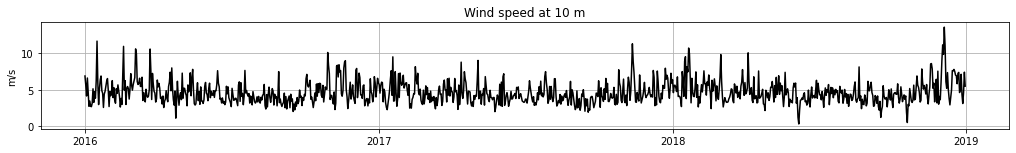

In [14]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])


# Define the date format
date_form = DateFormatter("%Y")


f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.xaxis.set_major_formatter(date_form)
f2_ax1.grid(True)
f2_ax1.xaxis.set_major_locator(dates.YearLocator())

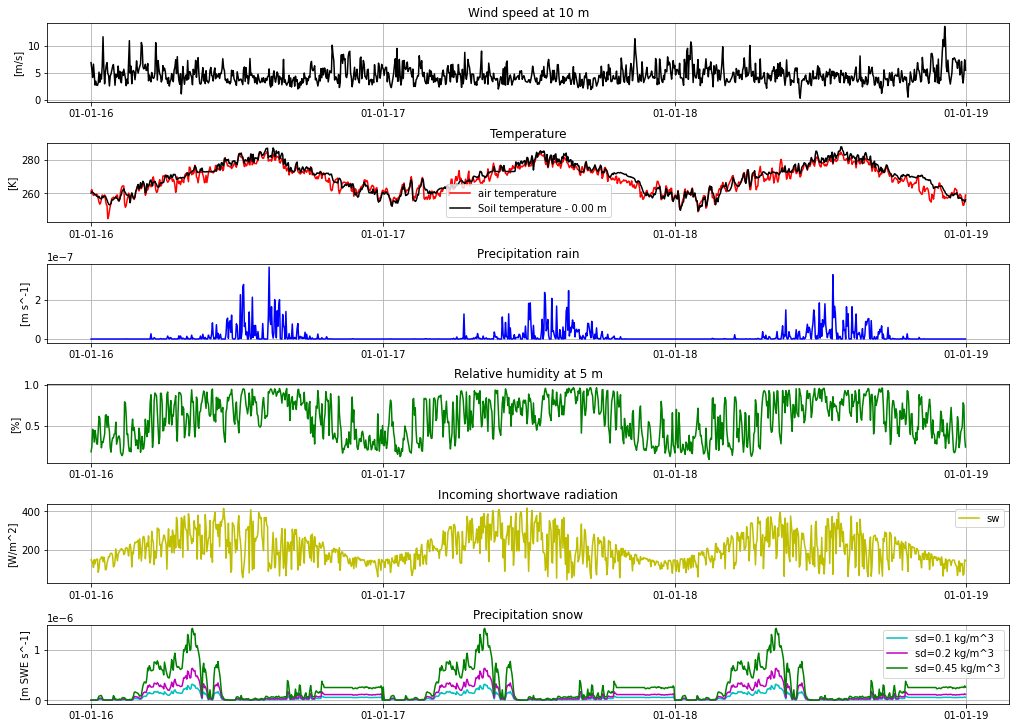

In [15]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Define the date format
date_form = DateFormatter("%d-%m-%y")


f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('[m/s]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.xaxis.set_major_formatter(date_form)
f2_ax1.grid(True)
f2_ax1.xaxis.set_major_locator(dates.YearLocator())

f2_ax2.set_title('Temperature')
f2_ax2.plot(data_input['air temperature [K]'], 'r',label='air temperature')
f2_ax2.plot(data_input['Soil temperature at - 0.00 m [K]'], 'k',label='Soil temperature - 0.00 m')
f2_ax2.set_ylabel('[K]')
#f2_ax1.set_xlabel('Date')
f2_ax2.xaxis.set_major_formatter(date_form)
f2_ax2.legend()
f2_ax2.grid(True)
f2_ax2.xaxis.set_major_locator(dates.YearLocator())

f2_ax3.set_title('Precipitation rain')
f2_ax3.plot(data_input['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.xaxis.set_major_formatter(date_form)
f2_ax3.grid(True)
f2_ax3.xaxis.set_major_locator(dates.YearLocator())

f2_ax4.set_title('Relative humidity at 5 m')
f2_ax4.plot(data_input['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('[%]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.xaxis.set_major_formatter(date_form)
f2_ax4.grid(True)
f2_ax4.xaxis.set_major_locator(dates.YearLocator())

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_input['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.xaxis.set_major_formatter(date_form)
f2_ax5.legend()
f2_ax5.grid(True)
f2_ax5.xaxis.set_major_locator(dates.YearLocator())

f2_ax6.set_title('Precipitation snow')
#f2_ax5.plot(data_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.1'], 'c',label='sd=0.1 kg/m^3')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.2'], 'm',label='sd=0.2 kg/m^3')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.45'], 'g',label='sd=0.45 kg/m^3')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.xaxis.set_major_formatter(date_form)
f2_ax6.legend()
f2_ax6.grid(True)
f2_ax6.xaxis.set_major_locator(dates.YearLocator())

In [16]:
ls

['air temperature [K]',
 'Soil temperature at - 0.00 m [K]',
 'Wind speed at 10 m (m/s)',
 'precipitation rain [m s^-1]',
 'Relative humidity at 5 m (%)',
 'Incoming shortwave radiation (W/m^2)',
 'precipitation snow [m SWE s^-1]_sd0.1',
 'precipitation snow [m SWE s^-1]_sd0.2',
 'precipitation snow [m SWE s^-1]_sd0.45',
 'precipitation snow [m SWE s^-1]_sd0.04',
 'precipitation snow [m SWE s^-1]_sd0.01']

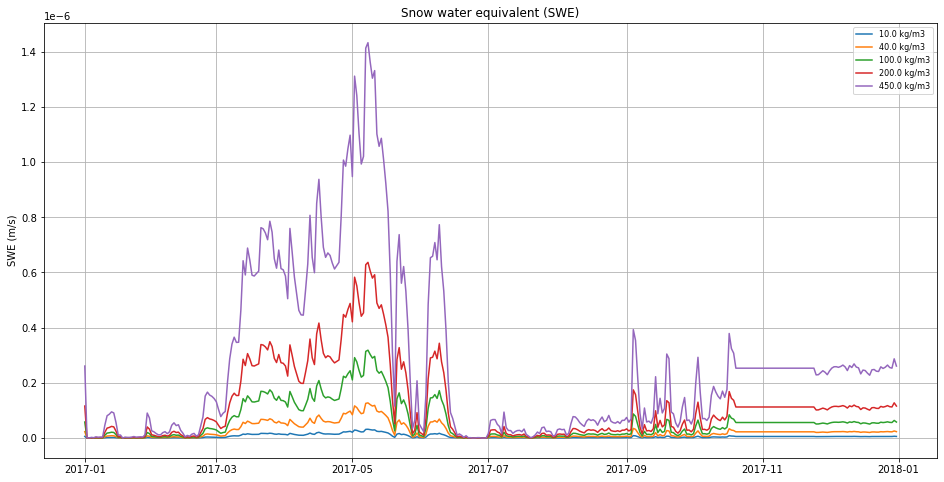

In [17]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(w=16,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

snow_densities = [0.01, 0.04, 0.1, 0.2, 0.45]

for i, value in enumerate(snow_densities):
    ax1.plot(data_input[f'precipitation snow [m SWE s^-1]_sd{value}']['2017'],label=f'{value*1000} kg/m3')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    

ax1.set_title('Snow water equivalent (SWE)')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('SWE (m/s)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

#### Testing the results from SWE simulation

In [58]:
# Storing the data in dataframes

sim_data_swe = pd.read_csv('Case5_2017_oldcomp.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_swe_iniT265 = pd.read_csv('Case5_2017_oldcomp_iniT265.demo/observation.dat',skiprows=88,sep=' ')

# Considering simulation results after the initial condition (after the first value)

sim_data_swe = sim_data_swe[1:]
sim_data_swe_iniT265 = sim_data_swe_iniT265[1:]


# Changing the index to time series
#sim_data_swe.index = Yakou_measured_data.loc['2017'].index


sim_data_swe.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
1   86400.0                   269.598163                  269.825767   
2  172800.0                   269.397326                  269.632773   
3  259200.0                   269.272355                  269.501614   
4  345600.0                   269.162667                  269.393161   
5  432000.0                   268.903696                  269.202670   

   point -0.2 temperature [K]  point -0.4 temperature [K]  \
1                  269.973592                  270.061269   
2                  269.814075                  269.944476   
3                  269.692433                  269.843107   
4                  269.590894                  269.754387   
5                  269.447252                  269.645109   

   point -0.8 temperature [K]  point -1.2 temperature [K]  \
1                  270.135914                  270.148316   
2                  270.095638                  270.138071   
3                  270.047453                  270.120907   
4                  269.996982                  270.098484   
5                  269.940186                  270.071202   

   point -1.6 temperature [K]  point -0.04 saturation liquid  \
1                  270.149730                       0.114531   
2                  270.146794                       0.114434   
3                  270.140498                       0.114377   
4                  270.130711                       0.114330   
5                  270.117454                       0.114225   

   point -0.1 saturation liquid  point -0.2 saturation liquid  \
1                      0.114651                      0.114736   
2                      0.114548                      0.114645   
3                      0.114483                      0.114579   
4                      0.114432                      0.114527   
5                      0.114347                      0.114457   

   point -0.4 saturation liquid  point -0.8 saturation liquid  \
1                      0.162516                      0.162516   
2                      0.162515                      0.162516   
3                      0.162515                      0.162516   
4                      0.162514                      0.162516   
5                      0.162514                      0.162515   

   point -1.2 saturation liquid  point -1.6 saturation liquid  
1                      0.162517                      0.162517  
2                      0.162517                      0.162517  
3                      0.162516                      0.162517  
4                      0.162516                      0.162516  
5                      0.162516                      0.162516

In [54]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [59]:
sim_data_swe = vwc_calc(sim_data_swe)
sim_data_swe_iniT265 = vwc_calc(sim_data_swe_iniT265)

In [60]:
len(sim_data_swe)

365

Text(0.5, 0, 'Days')

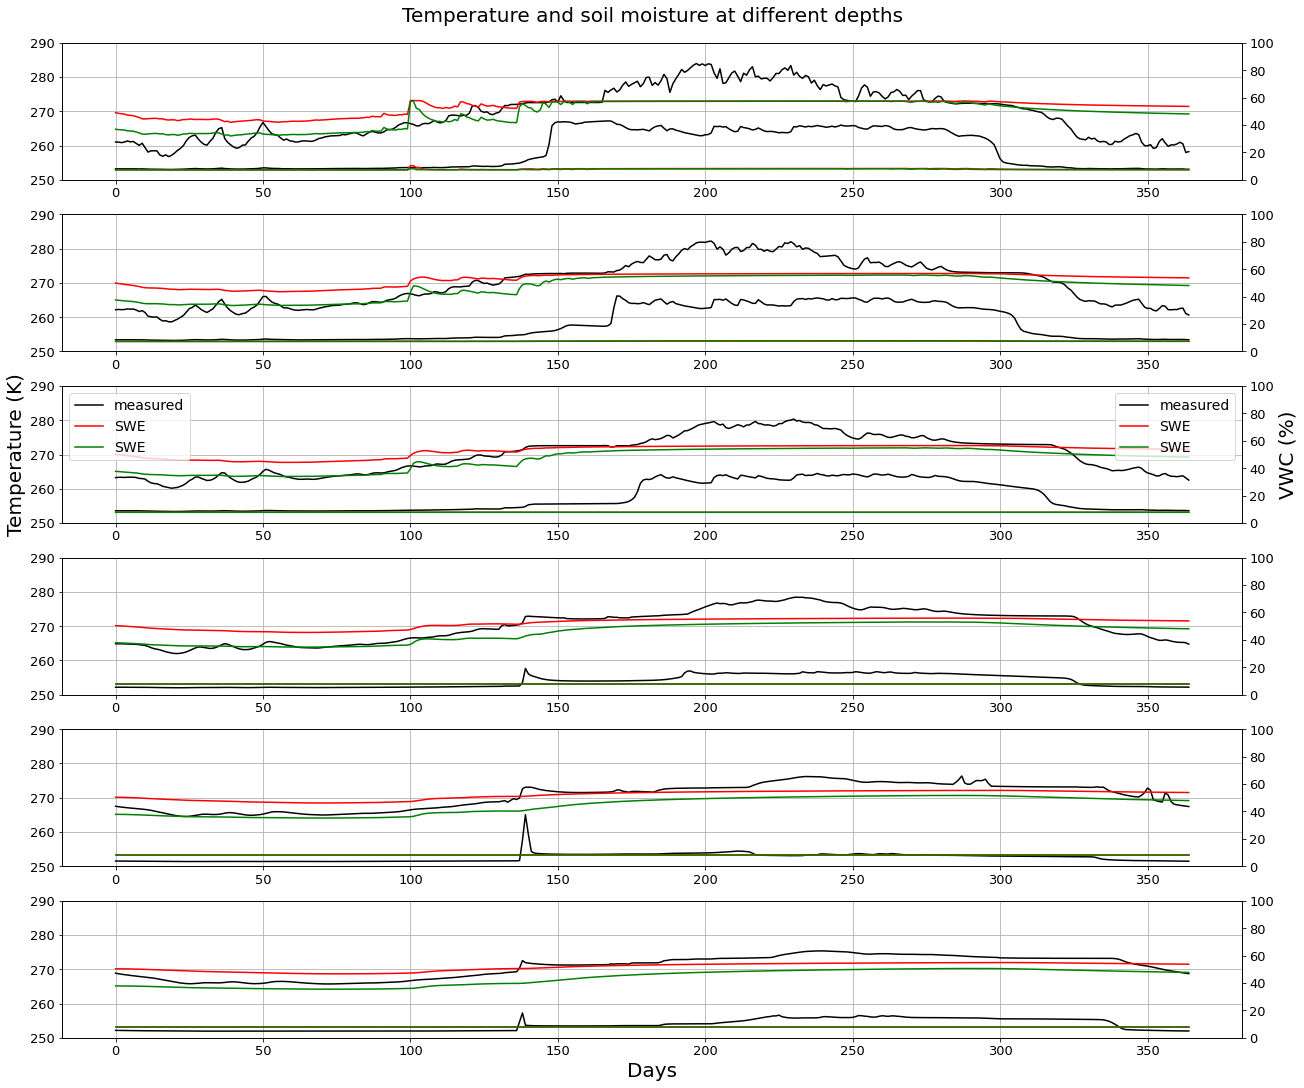

In [62]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)
time_period_1 = np.arange(0,len(sim_data_swe))

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_swe[f'point -{depth} temperature [K]'].values, 'r', label='SWE')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_swe_iniT265[f'point -{depth} temperature [K]'].values, 'g', label='SWE')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    #locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    ax2.plot(time_period_1, sim_data_swe[f'Soil moisture at - {depth} m (%)'].values, 'r', label='SWE')
    ax2.plot(time_period_1, sim_data_swe_iniT265[f'Soil moisture at - {depth} m (%)'].values, 'g', label='SWE')
    #ax2.plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    #ax2.plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    #ax2.plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

### Solution:

#### Comparing all the four results - 

In [18]:
# Storing the data in dataframes

sim_data_sd200 = pd.read_csv('Case5_III_C_glm_aftercalib.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd100 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.1.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd10 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.01.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd40 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.04.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

sim_data_sd10 = sim_data_sd10[1:]
sim_data_sd40 = sim_data_sd40[1:]
sim_data_sd100 = sim_data_sd100[1:]
sim_data_sd200 = sim_data_sd200[1:]

# Changing the index to time series
sim_data_sd10.index = Yakou_measured_data.index
sim_data_sd40.index = Yakou_measured_data.index
sim_data_sd100.index = Yakou_measured_data.index
sim_data_sd200.index = Yakou_measured_data.loc['2017'].index

sim_data_sd40.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
TIMESTAMP                                                                       
2016-01-01   86400.0                   269.439951                  269.738875   
2016-01-02  172800.0                   268.369493                  269.005538   
2016-01-03  259200.0                   267.285336                  268.173945   
2016-01-04  345600.0                   265.981254                  267.170290   
2016-01-05  432000.0                   264.187754                  265.819251   

            point -0.2 temperature [K]  point -0.4 temperature [K]  \
TIMESTAMP                                                            
2016-01-01                  269.928668                  270.039606   
2016-01-02                  269.445862                  269.738399   
2016-01-03                  268.841418                  269.323534   
2016-01-04                  268.094655                  268.791824   
2016-01-05                  267.100499                  268.084587   

            point -0.8 temperature [K]  point -1.2 temperature [K]  \
TIMESTAMP                                                            
2016-01-01                  270.132711                  270.147951   
2016-01-02                  270.048951                  270.128793   
2016-01-03                  269.903678                  270.085882   
2016-01-04                  269.693235                  270.012962   
2016-01-05                  269.401677                  269.902525   

            point -1.6 temperature [K]  point -0.04 saturation liquid  \
TIMESTAMP                                                               
2016-01-01                  270.149673                       0.114454   
2016-01-02                  270.144414                       0.114037   
2016-01-03                  270.130049                       0.113737   
2016-01-04                  270.102157                       0.113471   
2016-01-05                  270.055990                       0.113205   

            point -0.1 saturation liquid  point -0.2 saturation liquid  \
TIMESTAMP                                                                
2016-01-01                      0.114604                      0.114710   
2016-01-02                      0.114265                      0.114456   
2016-01-03                      0.113975                      0.114201   
2016-01-04                      0.113710                      0.113952   
2016-01-05                      0.113443                      0.113694   

            point -0.4 saturation liquid  point -0.8 saturation liquid  \
TIMESTAMP                                                                
2016-01-01                      0.162516                      0.162516   
2016-01-02                      0.162514                      0.162516   
2016-01-03                      0.162512                      0.162515   
2016-01-04                      0.162510                      0.162514   
2016-01-05                      0.162508                      0.162513   

            point -1.2 saturation liquid  point -1.6 saturation liquid  
TIMESTAMP                                                               
2016-01-01                      0.162517                      0.162517  
2016-01-02                      0.162516                      0.162517  
2016-01-03                      0.162516                      0.162516  
2016-01-04                      0.162516                      0.162516  
2016-01-05                      0.162515                      0.162516

In [19]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [20]:
sim_data_sd10_v = vwc_calc(sim_data_sd10)
sim_data_sd40_v = vwc_calc(sim_data_sd40)
sim_data_sd100_v = vwc_calc(sim_data_sd100)
sim_data_sd200_v = vwc_calc(sim_data_sd200)

sim_data_sd10_v.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
TIMESTAMP                                                                       
2016-01-01   86400.0                   269.439671                  269.738723   
2016-01-02  172800.0                   268.368121                  269.004691   
2016-01-03  259200.0                   267.280434                  268.170824   
2016-01-04  345600.0                   265.972329                  267.164205   
2016-01-05  432000.0                   264.168485                  265.806171   

            point -0.2 temperature [K]  point -0.4 temperature [K]  \
TIMESTAMP                                                            
2016-01-01                  269.928590                  270.039569   
2016-01-02                  269.445360                  269.738116   
2016-01-03                  268.839503                  269.322413   
2016-01-04                  268.090670                  268.789340   
2016-01-05                  267.091907                  268.079186   

            point -0.8 temperature [K]  point -1.2 temperature [K]  \
TIMESTAMP                                                            
2016-01-01                  270.132706                  270.147950   
2016-01-02                  270.048886                  270.128780   
2016-01-03                  269.903392                  270.085817   
2016-01-04                  269.692506                  270.012771   
2016-01-05                  269.400025                  269.902061   

            point -1.6 temperature [K]  point -0.04 saturation liquid  \
TIMESTAMP                                                               
2016-01-01                  270.149672                       0.114454   
2016-01-02                  270.144410                       0.114036   
2016-01-03                  270.130031                       0.113736   
2016-01-04                  270.102096                       0.113469   
2016-01-05                  270.055833                       0.113202   

            point -0.1 saturation liquid  ...  point -0.8 saturation liquid  \
TIMESTAMP                                 ...                                 
2016-01-01                      0.114604  ...                      0.162516   
2016-01-02                      0.114265  ...                      0.162516   
2016-01-03                      0.113975  ...                      0.162515   
2016-01-04                      0.113709  ...                      0.162514   
2016-01-05                      0.113441  ...                      0.162513   

            point -1.2 saturation liquid  point -1.6 saturation liquid  \
TIMESTAMP                                                                
2016-01-01                      0.162517                      0.162517   
2016-01-02                      0.162516                      0.162517   
2016-01-03                      0.162516                      0.162516   
2016-01-04                      0.162516                      0.162516   
2016-01-05                      0.162515                      0.162516   

            Soil moisture at - 0.04 m (%)  Soil moisture at - 0.1 m (%)  \
TIMESTAMP                                                                 
2016-01-01                       7.323676                      7.333292   
2016-01-02                       7.296976                      7.311592   
2016-01-03                       7.277750                      7.293026   
2016-01-04                       7.260701                      7.276012   
2016-01-05                       7.243623                      7.258868   

            Soil moisture at - 0.2 m (%)  Soil moisture at - 0.4 m (%)  \
TIMESTAMP                                                                
2016-01-01                      7.340080                      7.828732   
2016-01-02                      7.323848                      7.828648   
2016-01-03                      7.307490               

Text(0.5, 0, 'Days')

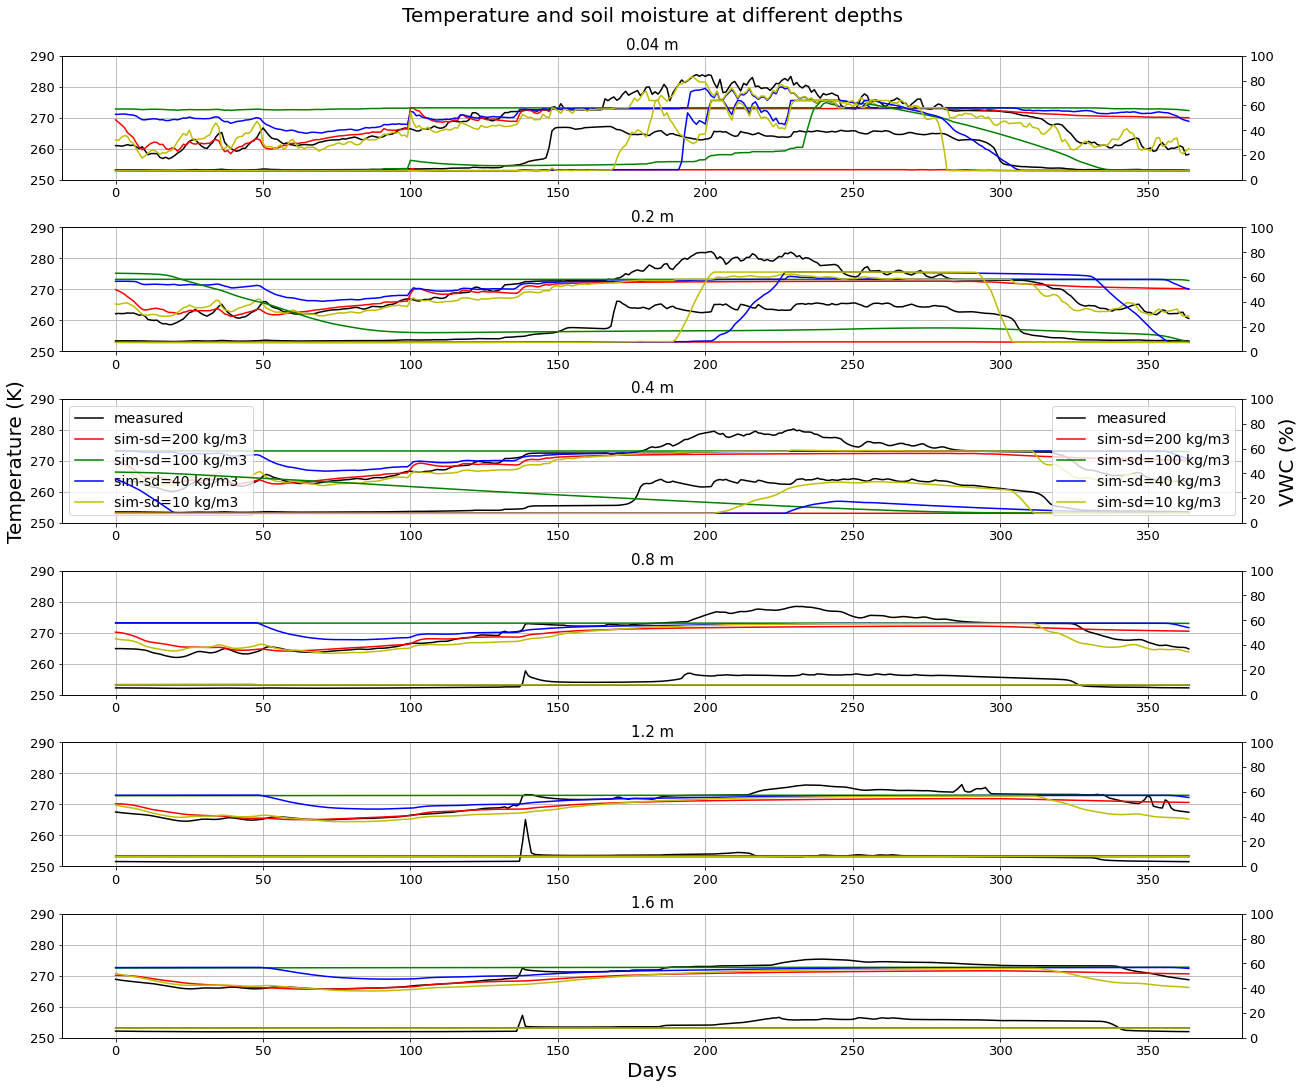

In [21]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    ax2.plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    ax2.plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    ax2.plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    ax2.plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

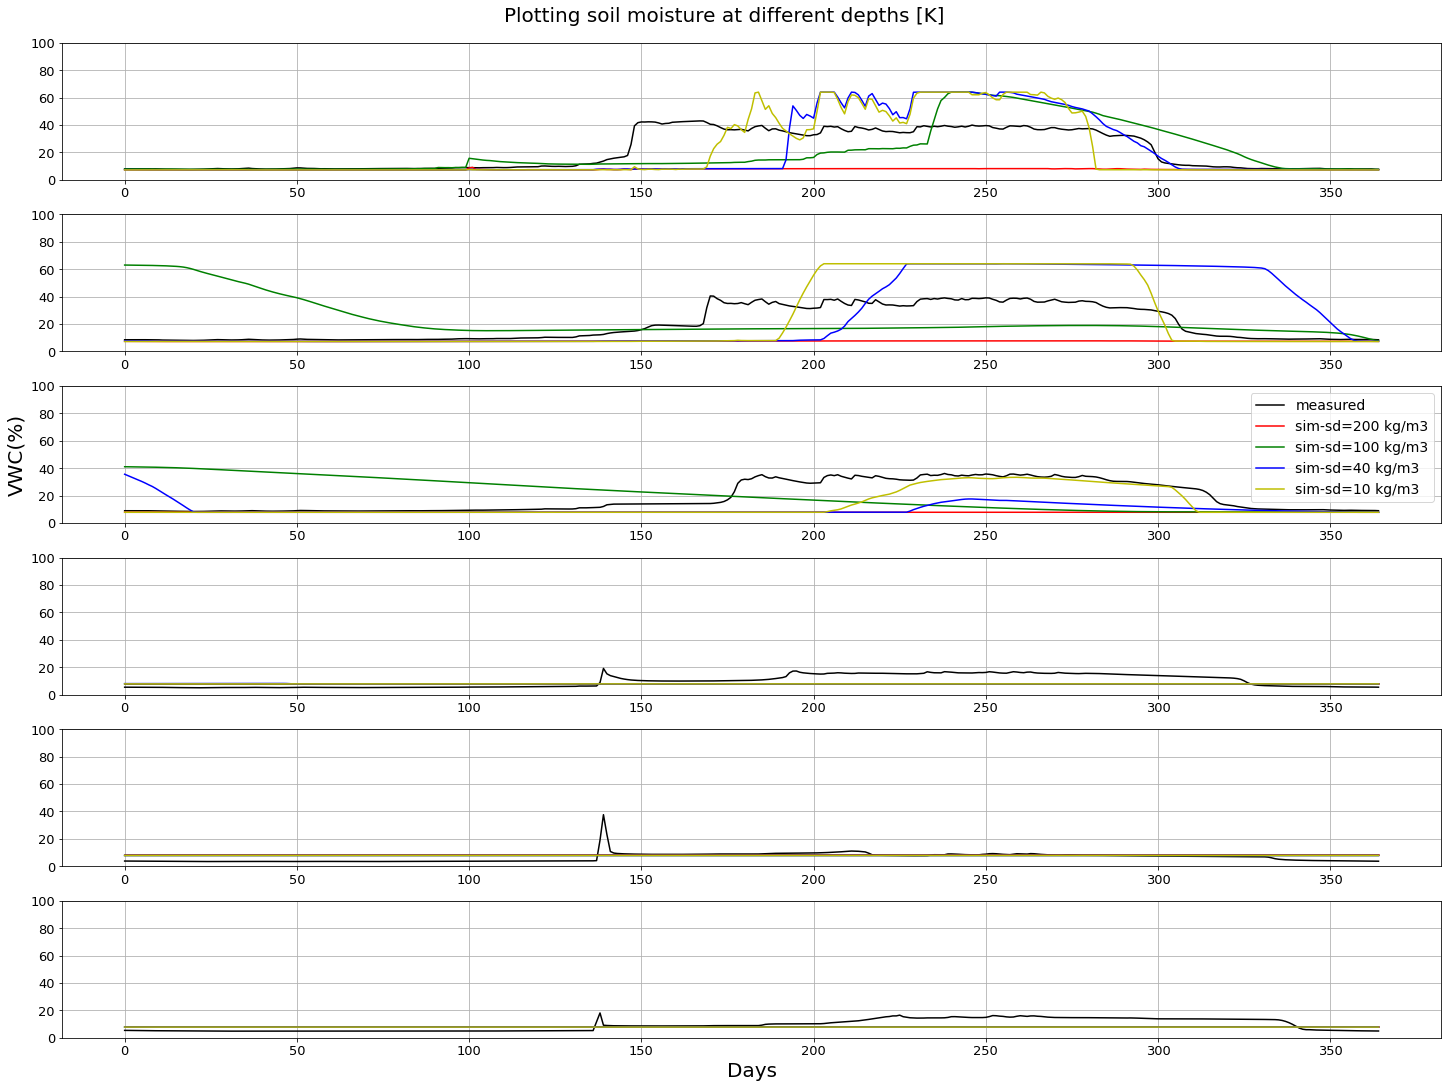

In [22]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    locals()['f2_ax'+str(j+1)].grid(True)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC(%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

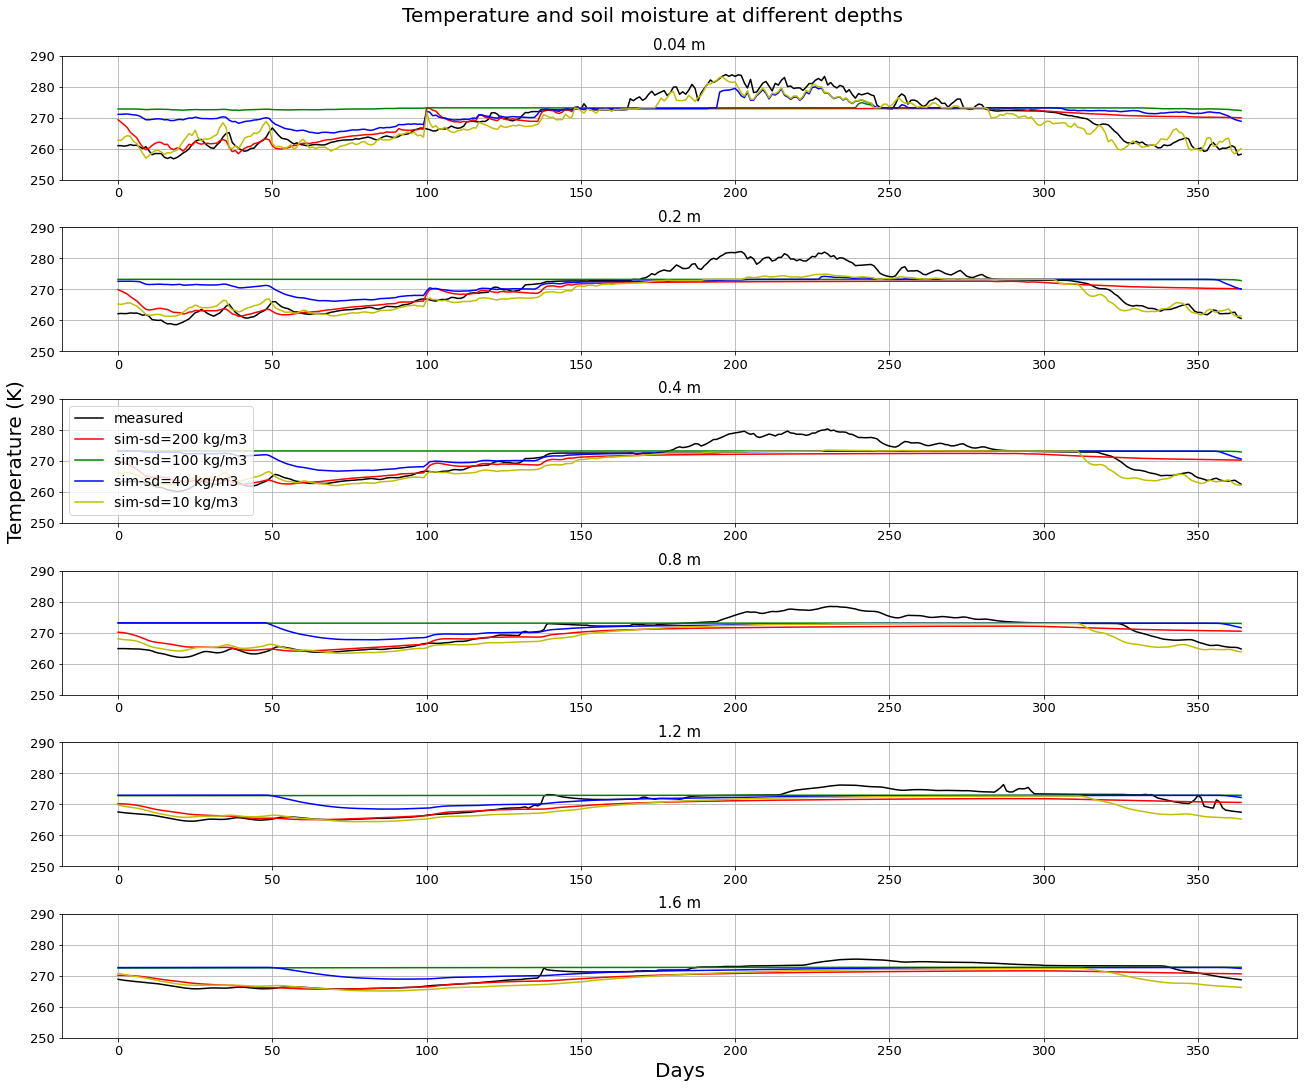

In [23]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

        

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)


f2_ax6.set_xlabel('Days', fontsize=20)

In [24]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [25]:
sim_data = pd.read_csv('Case5_III_C_glm_aftercalib.demo/observation.dat',skiprows=88,sep=' ')
sim_data.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
0       0.0                   270.150000                  270.150000   
1   86400.0                   269.354756                  269.693612   
2  172800.0                   268.547778                  269.101196   
3  259200.0                   267.725979                  268.457257   
4  345600.0                   266.809187                  267.732700   

   point -0.2 temperature [K]  point -0.4 temperature [K]  \
0                  270.150000                  270.150000   
1                  269.905882                  270.028870   
2                  269.495265                  269.762655   
3                  269.015229                  269.424485   
4                  268.461698                  269.019737   

   point -0.8 temperature [K]  point -1.2 temperature [K]  \
0                  270.150000                  270.150000   
1                  270.131190                  270.147782   
2                  270.053052                  270.129424   
3                  269.928339                  270.091143   
4                  269.759050                  270.029767   

   point -1.6 temperature [K]  point -0.04 saturation liquid  \
0                  270.150000                       0.114846   
1                  270.149647                       0.114414   
2                  270.144554                       0.114096   
3                  270.131473                       0.113848   
4                  270.107357                       0.113630   

   point -0.1 saturation liquid  point -0.2 saturation liquid  \
0                      0.114846                      0.114846   
1                      0.114580                      0.114697   
2                      0.114304                      0.114480   
3                      0.114065                      0.114269   
4                      0.113850                      0.114067   

   point -0.4 saturation liquid  point -0.8 saturation liquid  \
0                      0.162517                      0.162517   
1                      0.162516                      0.162516   
2                      0.162514                      0.162516   
3                      0.162513                      0.162515   
4                      0.162511                      0.162514   

   point -1.2 saturation liquid  point -1.6 saturation liquid  
0                      0.162517                      0.162517  
1                      0.162517                      0.162517  
2                      0.162516                      0.162517  
3                      0.162516                      0.162516  
4                      0.162516                      0.162516

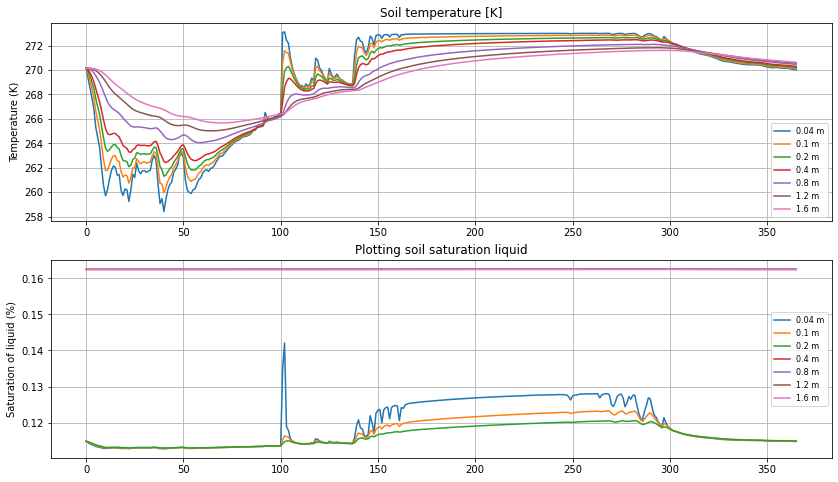

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(sim_data[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(sim_data[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


In [27]:
Yakou_measured_data.columns

Index(['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 m (°C)',
       'Soil temperature at - 0.2 m (°C)', 'Soil temperature at - 0.4 m (°C)',
       'Soil temperature at - 0.8 m (°C)', 'Soil temperature at - 1.2 m (°C)',
       'Soil temperature at - 1.6 m (°C)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 

Text(0.5, 0, 'Days')

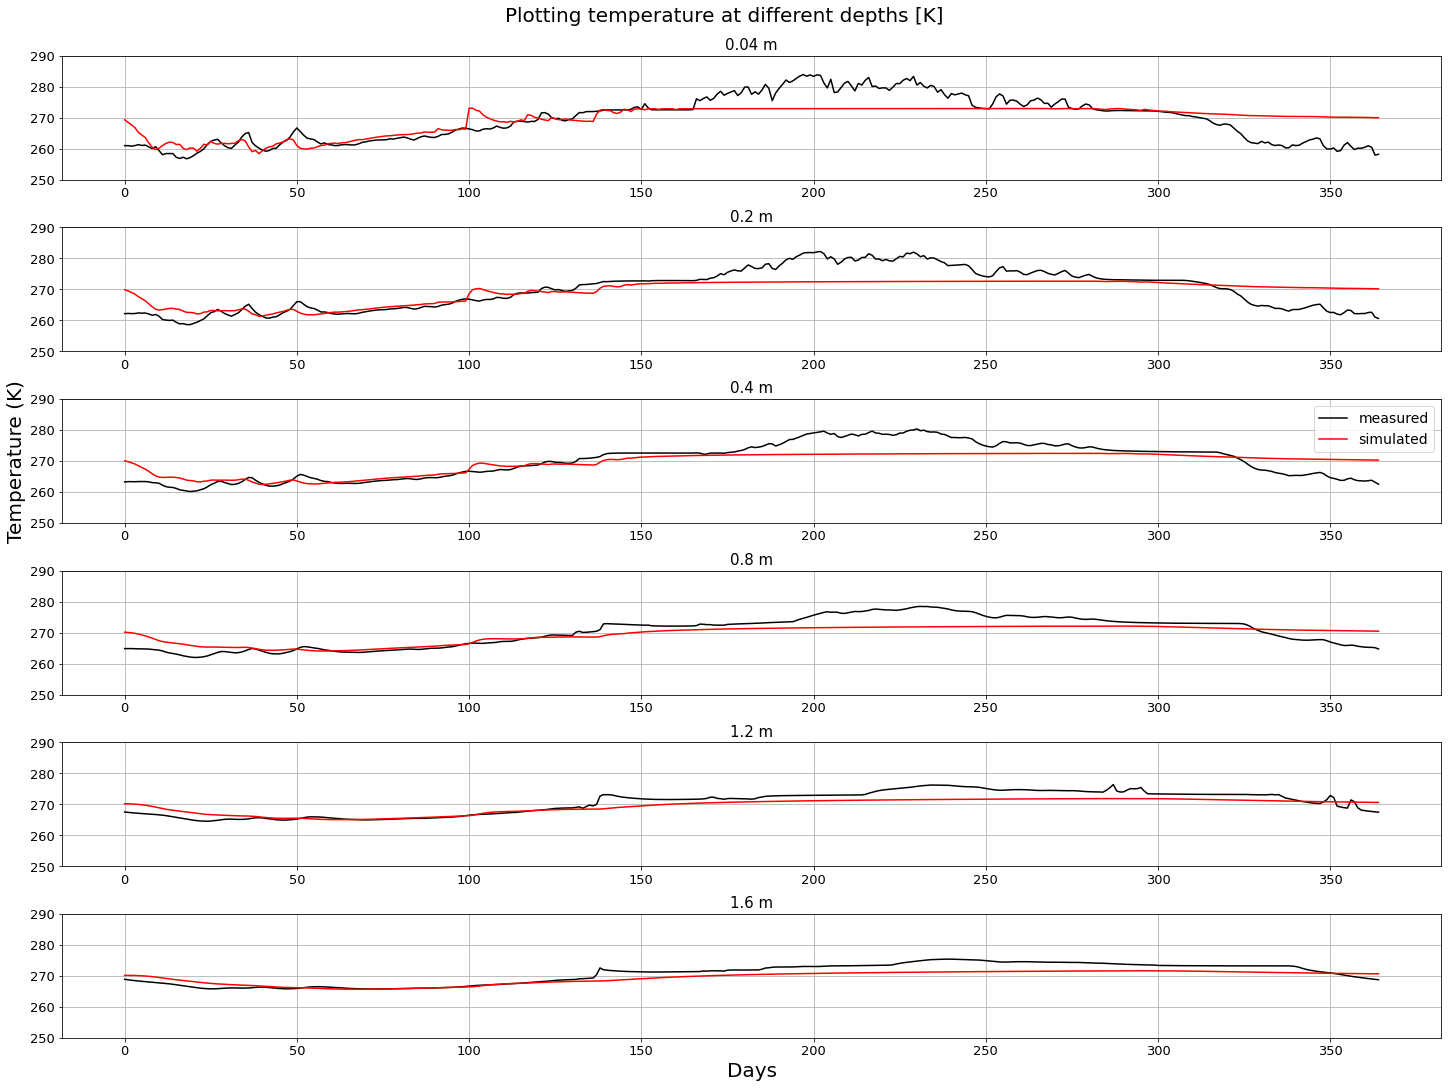

In [28]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

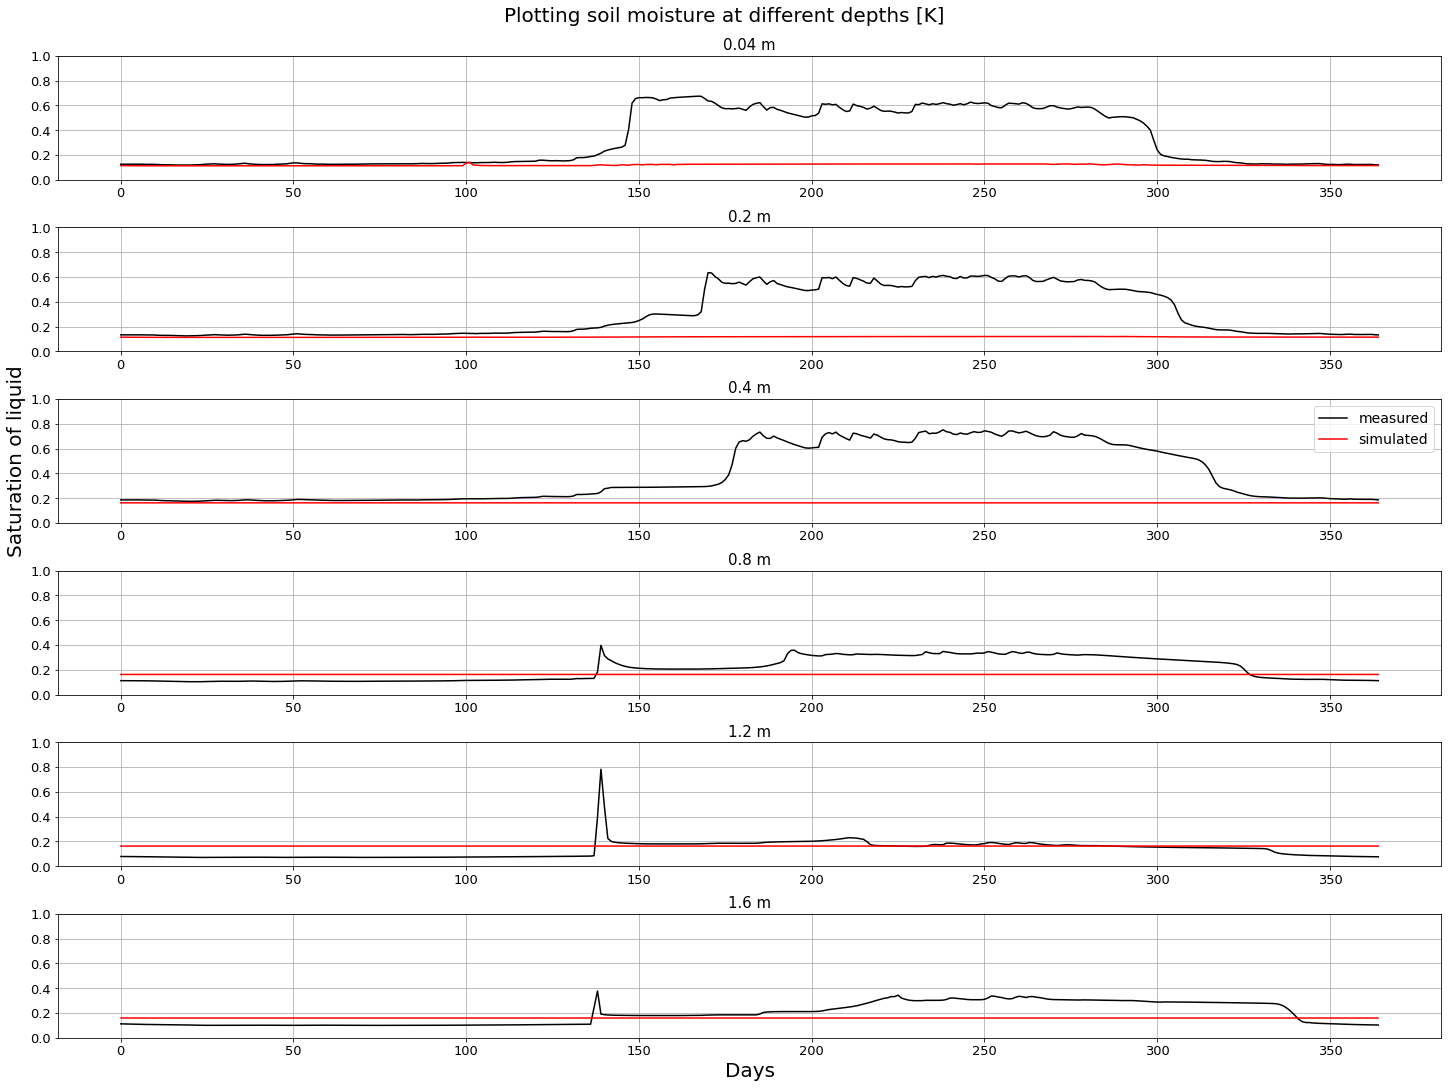

In [146]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Check for 3 years! - Case5_III_C_calib_3yrs.demo

In [147]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [148]:
sim_data_3yrs = pd.read_csv('Case5_III_C_calib_3yrs.demo/observation.dat',skiprows=88,sep=' ')
sim_data_3yrs.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
0       0.0                   270.150000                  270.150000   
1   86400.0                   269.441440                  269.739685   
2  172800.0                   268.376772                  269.010034   
3  259200.0                   267.311178                  268.190402   
4  345600.0                   266.028226                  267.202324   

   point -0.2 temperature [K]  point -0.4 temperature [K]  \
0                  270.150000                  270.150000   
1                  269.929084                  270.039806   
2                  269.448526                  269.739901   
3                  268.851517                  269.329447   
4                  268.115640                  268.804909   

   point -0.8 temperature [K]  point -1.2 temperature [K]  \
0                  270.150000                  270.150000   
1                  270.132740                  270.147954   
2                  270.049295                  270.128862   
3                  269.905186                  270.086227   
4                  269.697073                  270.013969   

   point -1.6 temperature [K]  point -0.04 saturation liquid  \
0                  270.150000                       0.114846   
1                  270.149673                       0.114454   
2                  270.144431                       0.114039   
3                  270.130148                       0.113743   
4                  270.102478                       0.113479   

   point -0.1 saturation liquid  point -0.2 saturation liquid  \
0                      0.114846                      0.114846   
1                      0.114604                      0.114710   
2                      0.114267                      0.114458   
3                      0.113980                      0.114205   
4                      0.113717                      0.113958   

   point -0.4 saturation liquid  point -0.8 saturation liquid  \
0                      0.162517                      0.162517   
1                      0.162516                      0.162516   
2                      0.162514                      0.162516   
3                      0.162512                      0.162515   
4                      0.162510                      0.162514   

   point -1.2 saturation liquid  point -1.6 saturation liquid  
0                      0.162517                      0.162517  
1                      0.162517                      0.162517  
2                      0.162516                      0.162517  
3                      0.162516                      0.162516  
4                      0.162516                      0.162516

In [149]:
sim_data_3yrs.index

RangeIndex(start=0, stop=1097, step=1)

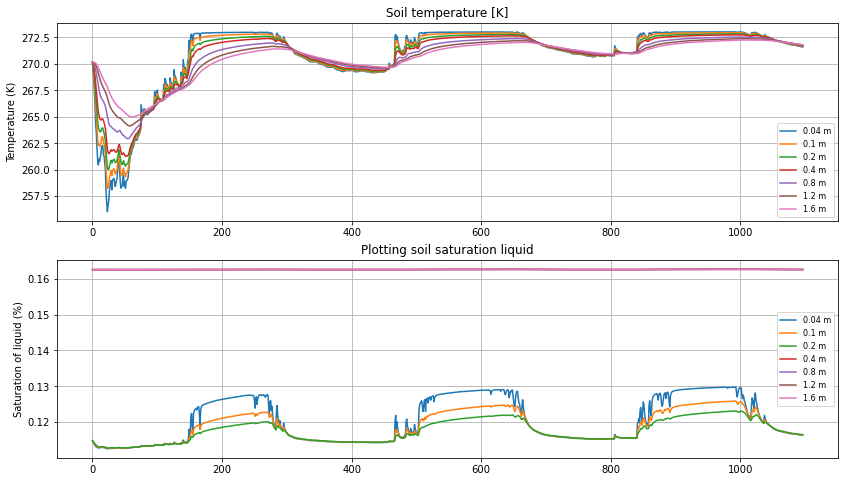

In [150]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(sim_data_3yrs[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(sim_data_3yrs[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


Text(0.5, 0, 'Days')

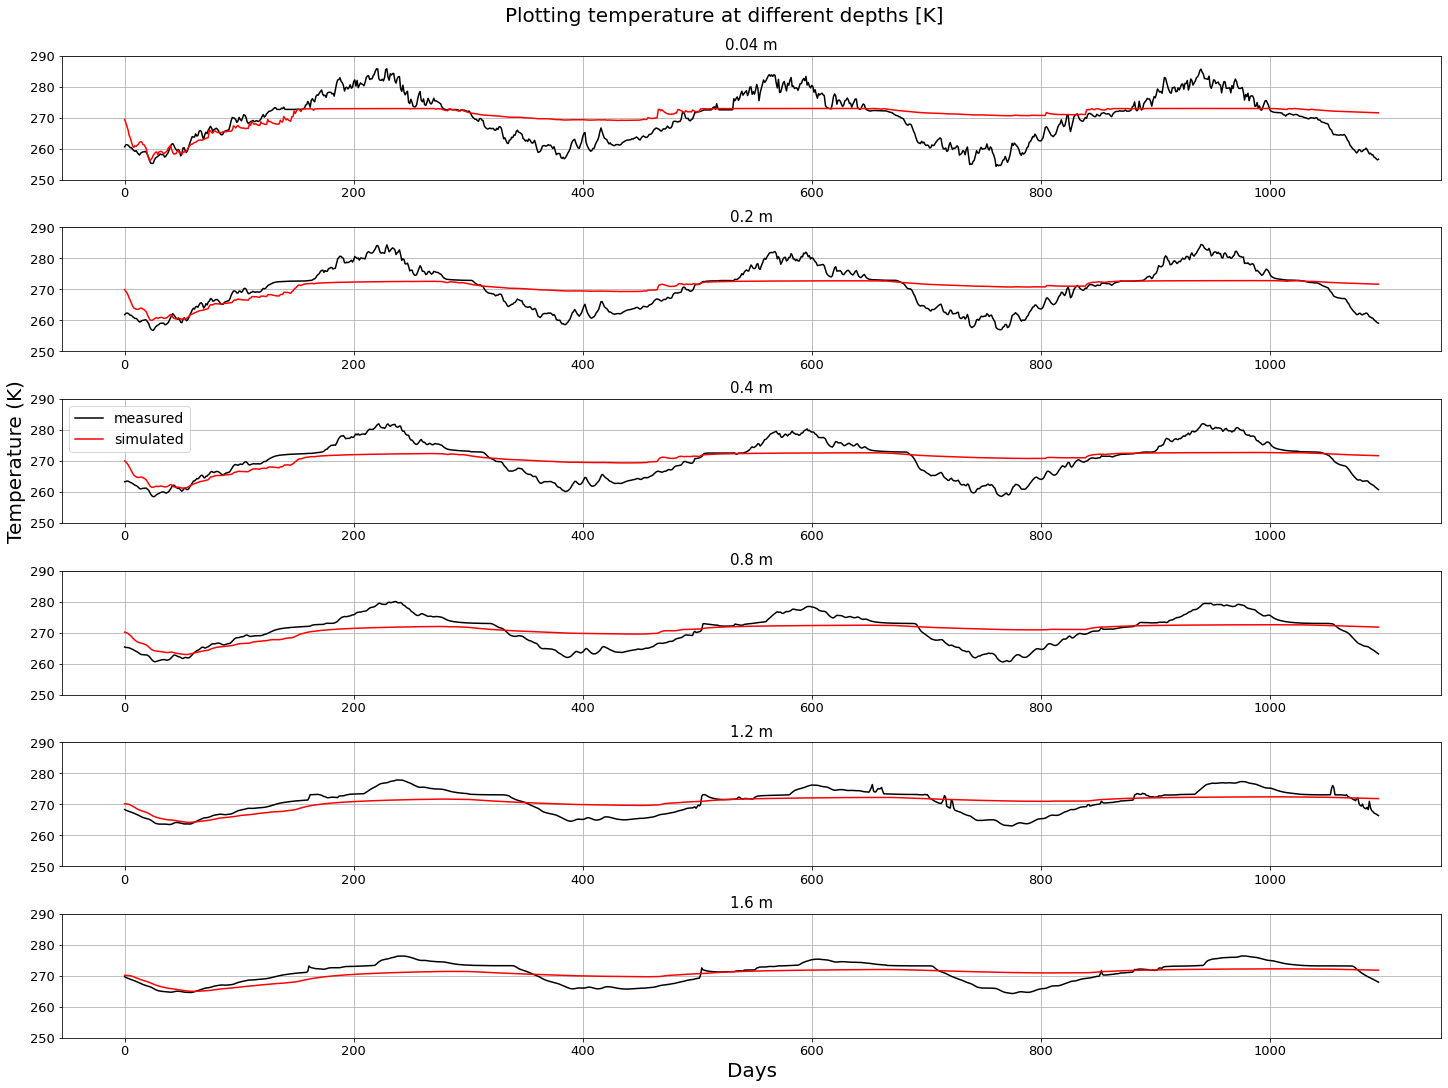

In [153]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

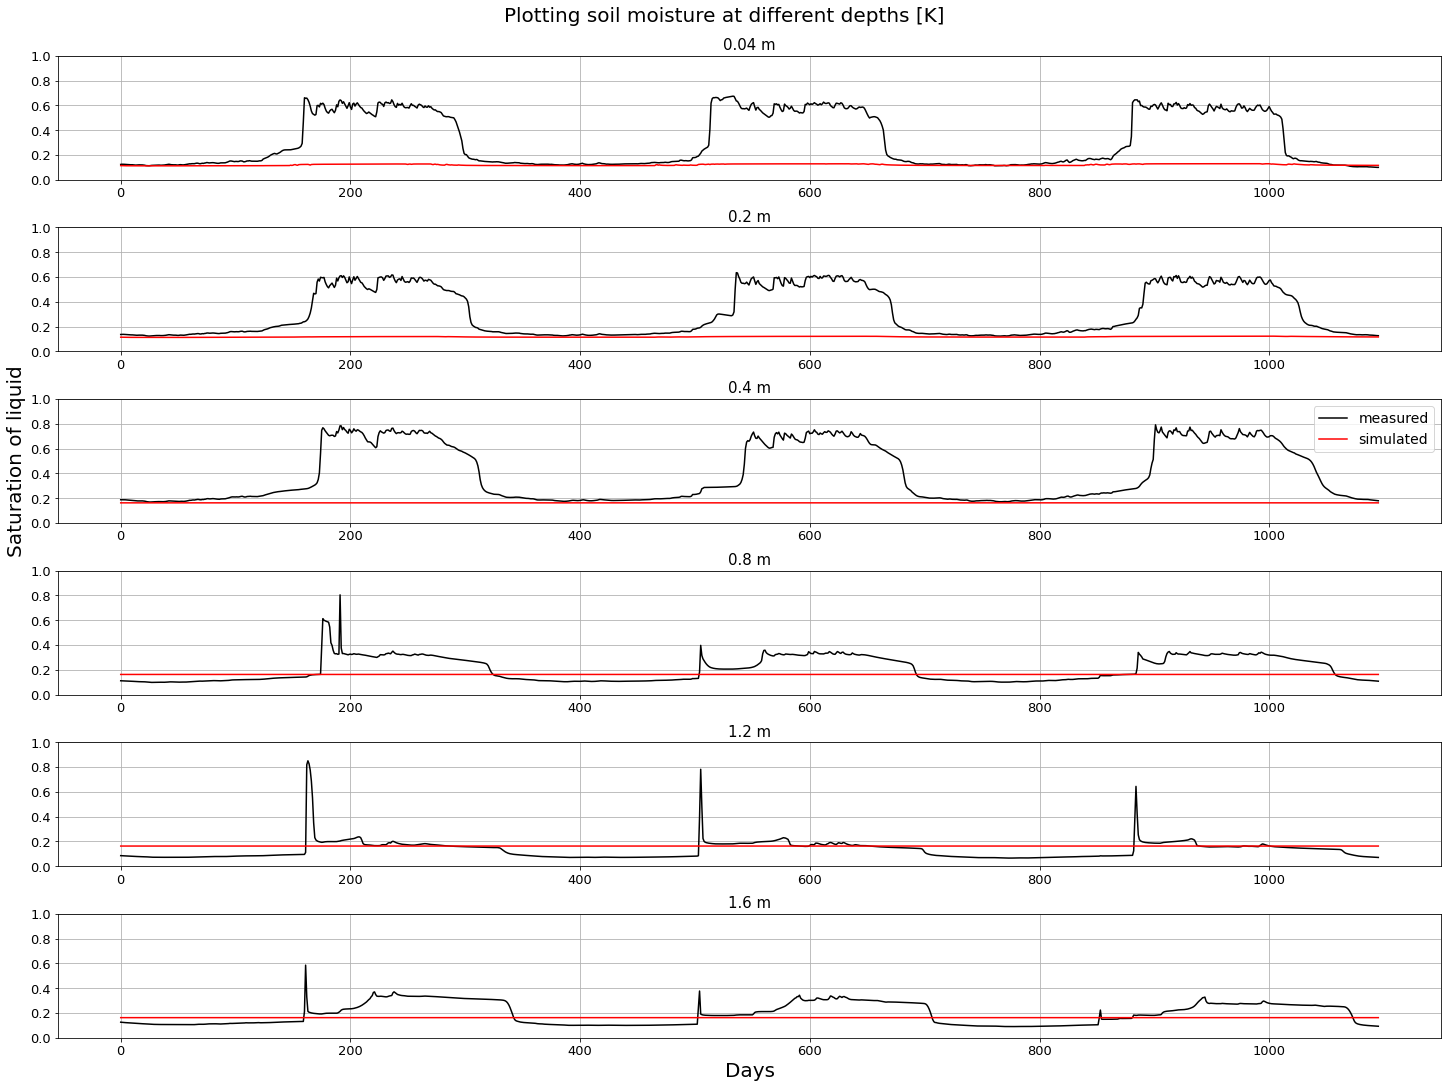

In [155]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Check for 3 years! - Case5_III_C_calib_3yrs_sd0.1.demo

In [156]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [157]:
sim_data_3yrs_sd01 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.1.demo/observation.dat',skiprows=88,sep=' ')
sim_data_3yrs_sd01.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
0       0.0                   270.150000                  270.150000   
1   86400.0                   269.440511                  269.739179   
2  172800.0                   268.372230                  269.007228   
3  259200.0                   267.295087                  268.180153   
4  345600.0                   265.998992                  267.182386   

   point -0.2 temperature [K]  point -0.4 temperature [K]  \
0                  270.150000                  270.150000   
1                  269.928824                  270.039681   
2                  269.446863                  269.738964   
3                  268.845227                  269.325764   
4                  268.102577                  268.796763   

   point -0.8 temperature [K]  point -1.2 temperature [K]  \
0                  270.150000                  270.150000   
1                  270.132722                  270.147952   
2                  270.049080                  270.128819   
3                  269.904246                  270.086012   
4                  269.694683                  270.013342   

   point -1.6 temperature [K]  point -0.04 saturation liquid  \
0                  270.150000                       0.114846   
1                  270.149673                       0.114454   
2                  270.144420                       0.114038   
3                  270.130087                       0.113739   
4                  270.102278                       0.113474   

   point -0.1 saturation liquid  point -0.2 saturation liquid  \
0                      0.114846                      0.114846   
1                      0.114604                      0.114710   
2                      0.114266                      0.114457   
3                      0.113977                      0.114203   
4                      0.113713                      0.113954   

   point -0.4 saturation liquid  point -0.8 saturation liquid  \
0                      0.162517                      0.162517   
1                      0.162516                      0.162516   
2                      0.162514                      0.162516   
3                      0.162512                      0.162515   
4                      0.162510                      0.162514   

   point -1.2 saturation liquid  point -1.6 saturation liquid  
0                      0.162517                      0.162517  
1                      0.162517                      0.162517  
2                      0.162516                      0.162517  
3                      0.162516                      0.162516  
4                      0.162516                      0.162516

In [158]:
sim_data_3yrs_sd01.index

RangeIndex(start=0, stop=1097, step=1)

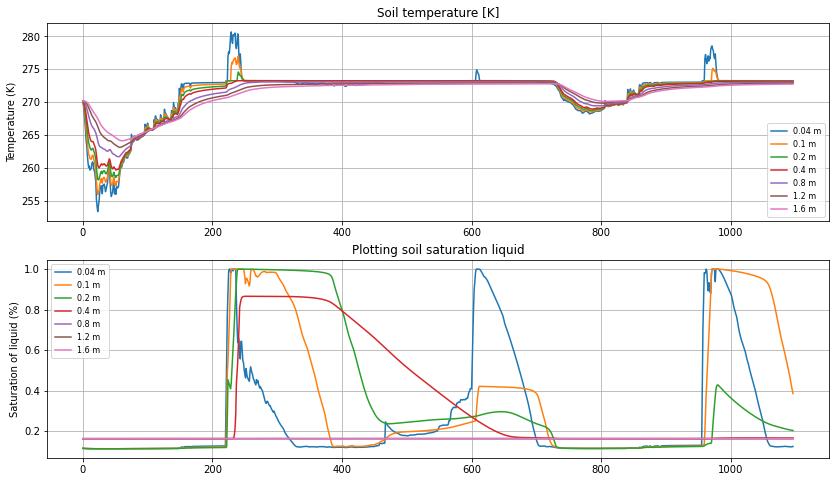

In [159]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(sim_data_3yrs_sd01[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(sim_data_3yrs_sd01[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


Text(0.5, 0, 'Days')

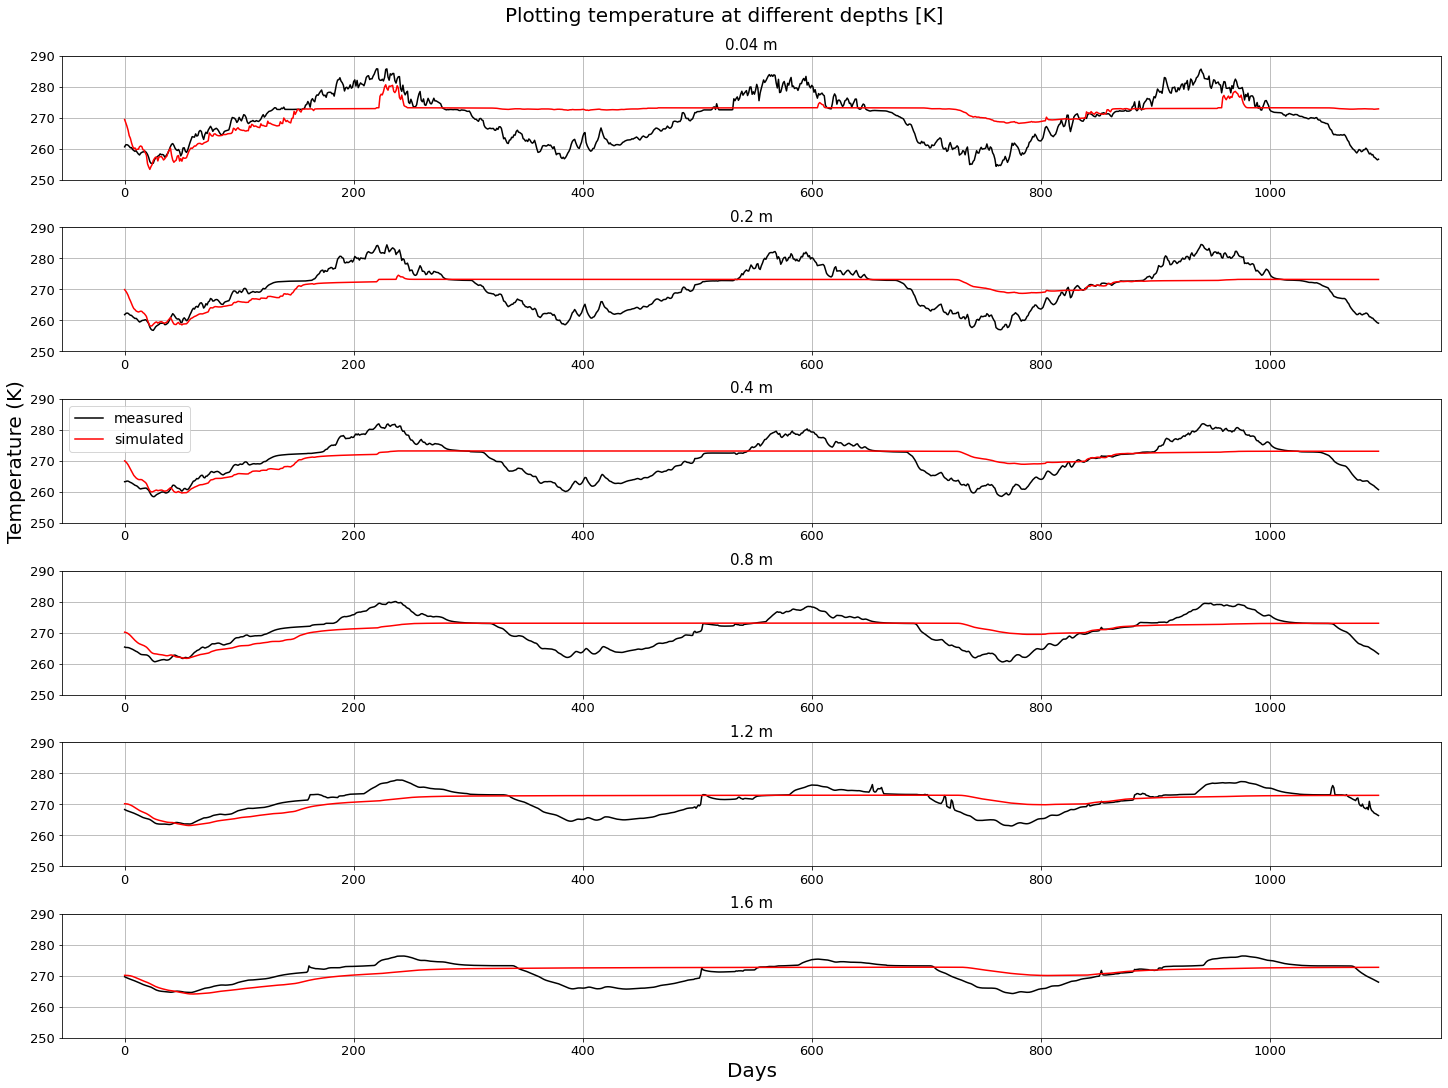

In [160]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd01[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

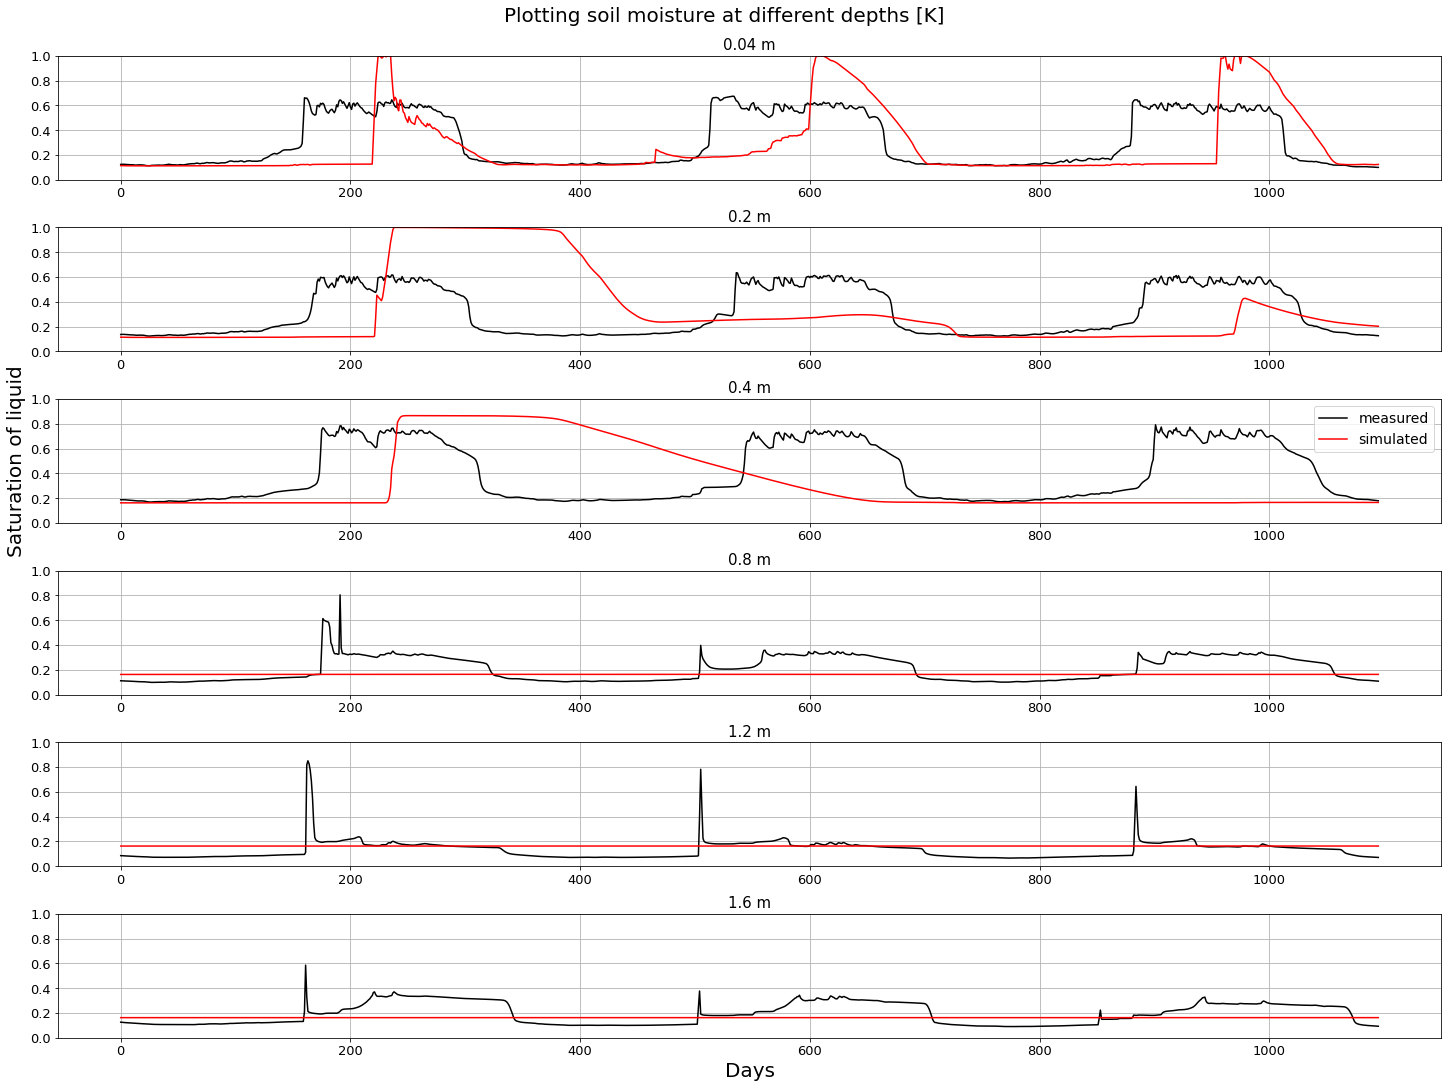

In [161]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd01[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Check for 3 years! - Case5_III_C_calib_3yrs_sd0.01.demo

In [167]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [168]:
sim_data_3yrs_sd001 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.01.demo/observation.dat',skiprows=88,sep=' ')
sim_data_3yrs_sd001.head()

time [s]  point -0.04 temperature [K]  point -0.1 temperature [K]  \
0       0.0                   270.150000                  270.150000   
1   86400.0                   269.439671                  269.738723   
2  172800.0                   268.368121                  269.004691   
3  259200.0                   267.280434                  268.170824   
4  345600.0                   265.972329                  267.164205   

   point -0.2 temperature [K]  point -0.4 temperature [K]  \
0                  270.150000                  270.150000   
1                  269.928590                  270.039569   
2                  269.445360                  269.738116   
3                  268.839503                  269.322413   
4                  268.090670                  268.789340   

   point -0.8 temperature [K]  point -1.2 temperature [K]  \
0                  270.150000                  270.150000   
1                  270.132706                  270.147950   
2                  270.048886                  270.128780   
3                  269.903392                  270.085817   
4                  269.692506                  270.012771   

   point -1.6 temperature [K]  point -0.04 saturation liquid  \
0                  270.150000                       0.114846   
1                  270.149672                       0.114454   
2                  270.144410                       0.114036   
3                  270.130031                       0.113736   
4                  270.102096                       0.113469   

   point -0.1 saturation liquid  point -0.2 saturation liquid  \
0                      0.114846                      0.114846   
1                      0.114604                      0.114710   
2                      0.114265                      0.114456   
3                      0.113975                      0.114201   
4                      0.113709                      0.113950   

   point -0.4 saturation liquid  point -0.8 saturation liquid  \
0                      0.162517                      0.162517   
1                      0.162516                      0.162516   
2                      0.162514                      0.162516   
3                      0.162512                      0.162515   
4                      0.162510                      0.162514   

   point -1.2 saturation liquid  point -1.6 saturation liquid  
0                      0.162517                      0.162517  
1                      0.162517                      0.162517  
2                      0.162516                      0.162517  
3                      0.162516                      0.162516  
4                      0.162516                      0.162516

In [169]:
sim_data_3yrs_sd01.index

RangeIndex(start=0, stop=1097, step=1)

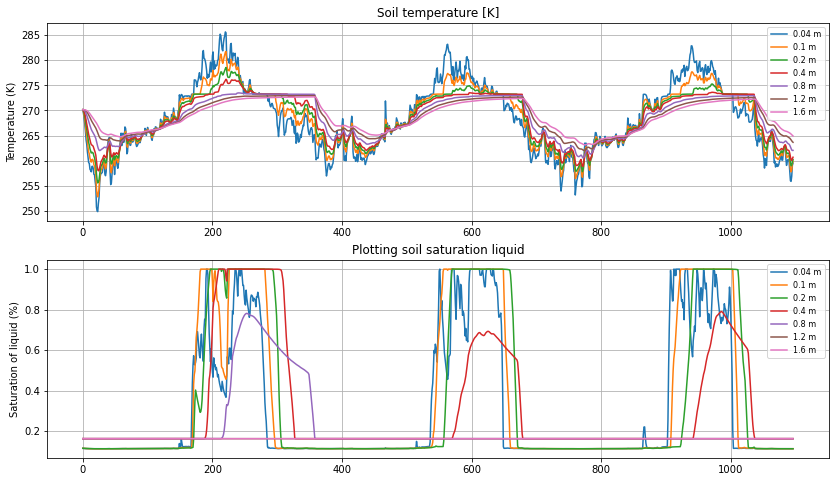

In [170]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(sim_data_3yrs_sd001[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(sim_data_3yrs_sd001[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


Text(0.5, 0, 'Days')

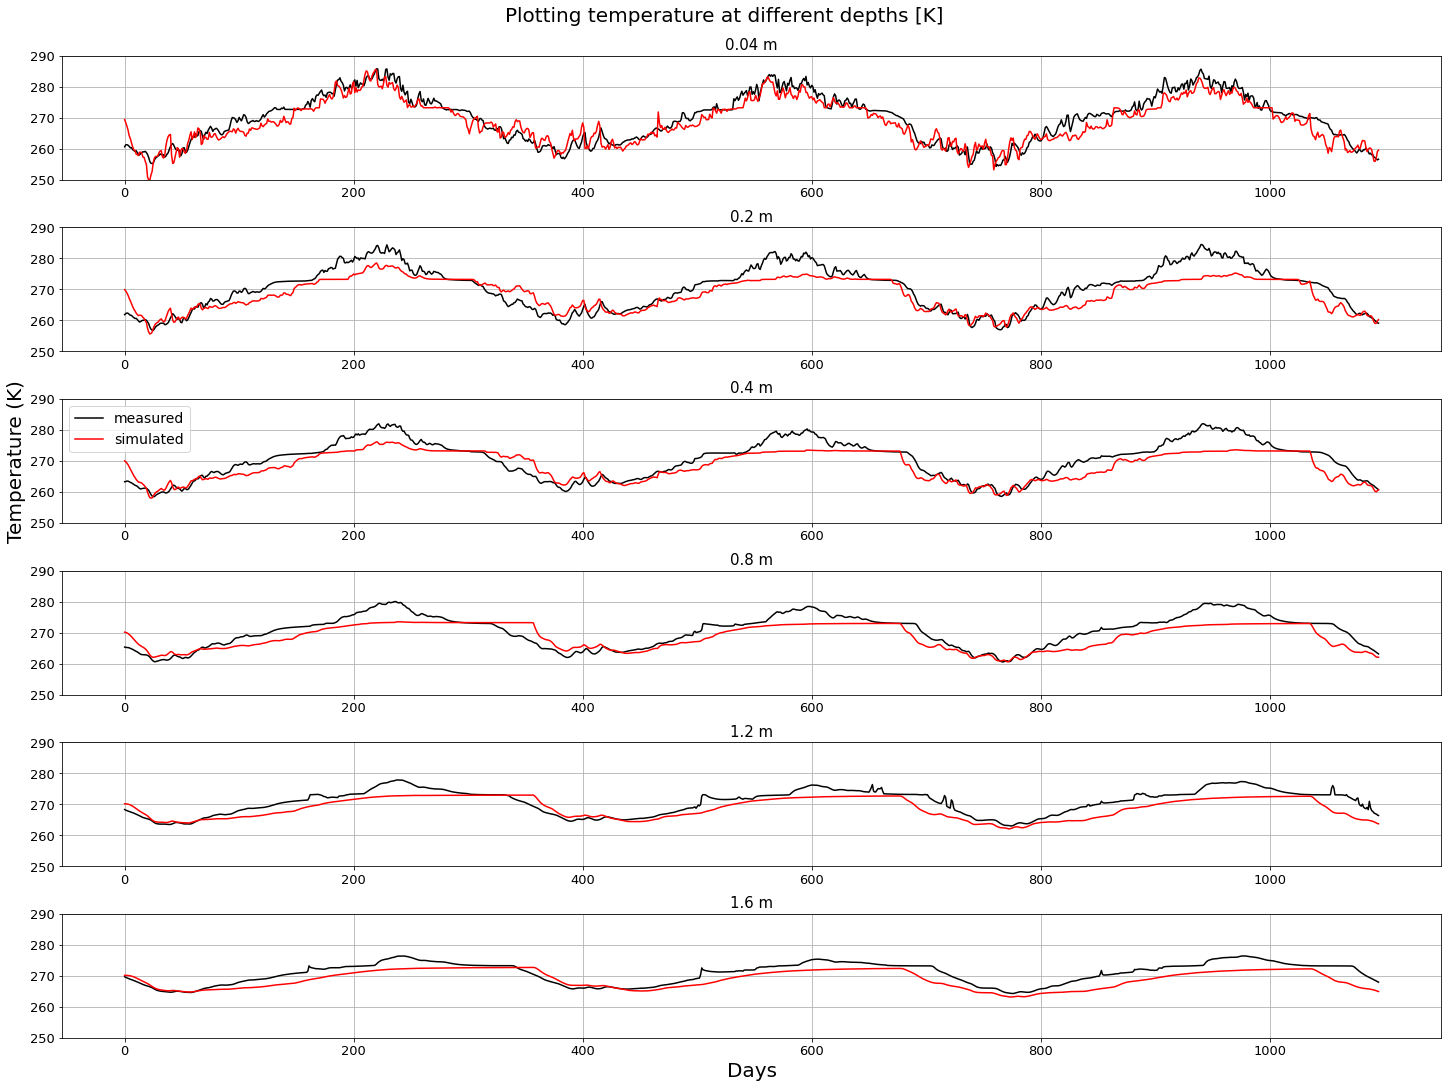

In [173]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd001[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

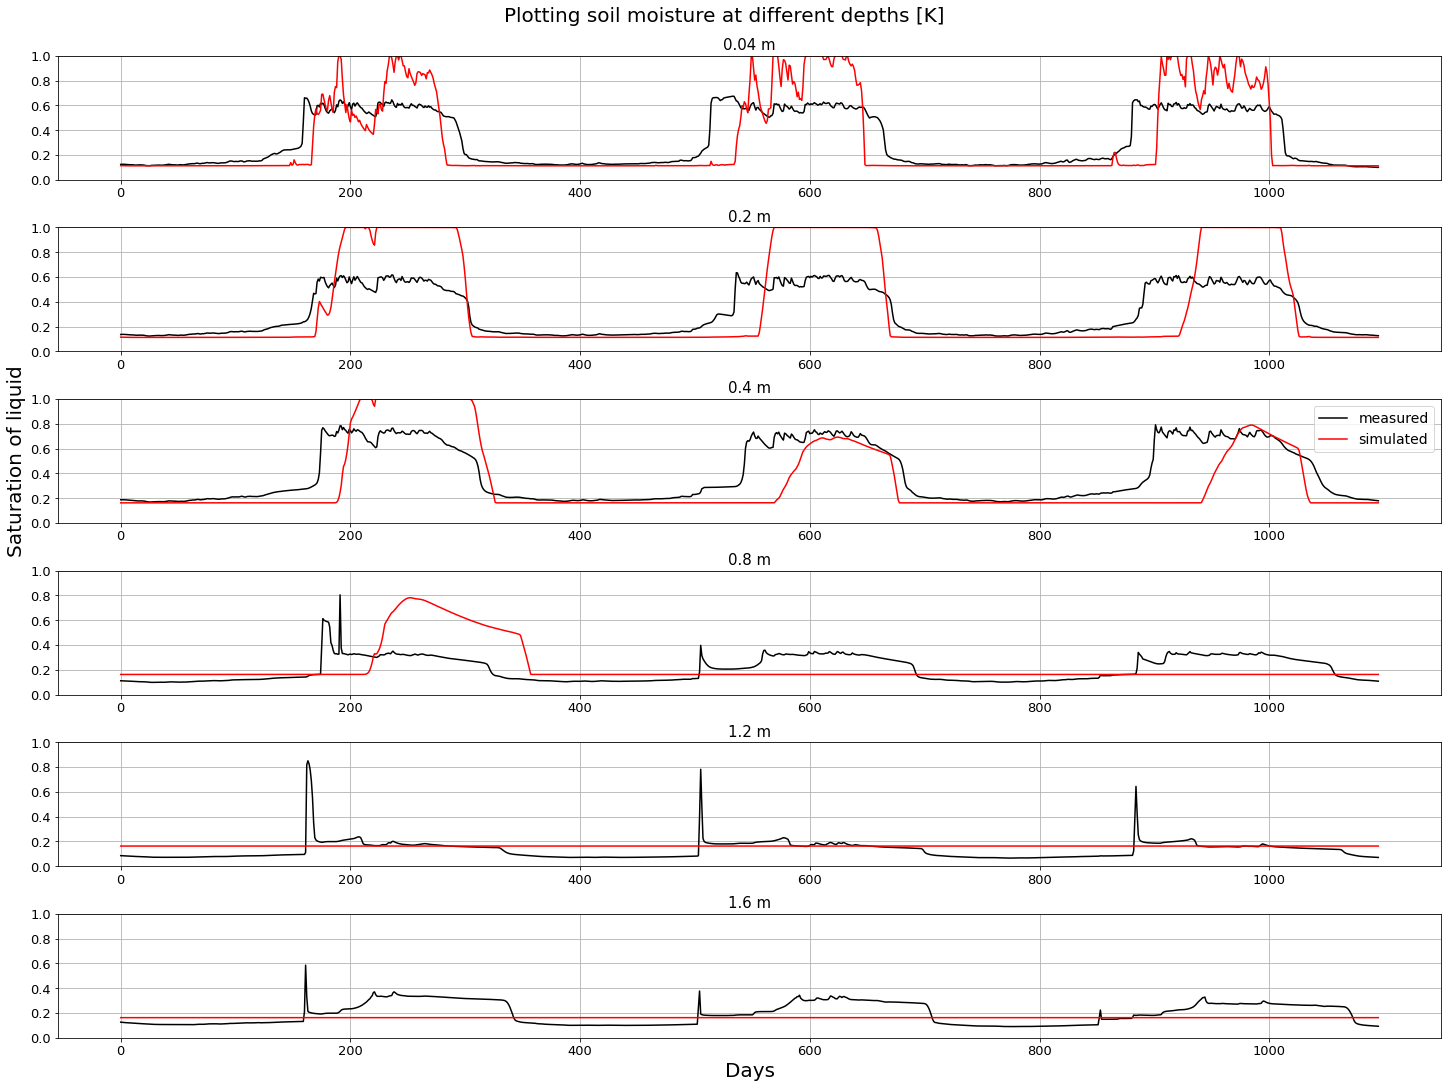

In [174]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd001[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

In [184]:
sim_data_3yrs_sd004 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.04.demo/observation.dat',skiprows=88,sep=' ')
sim_data_3yrs_sd004.index

RangeIndex(start=0, stop=1097, step=1)

### Comparing all the four results:

Text(0.5, 0, 'Days')

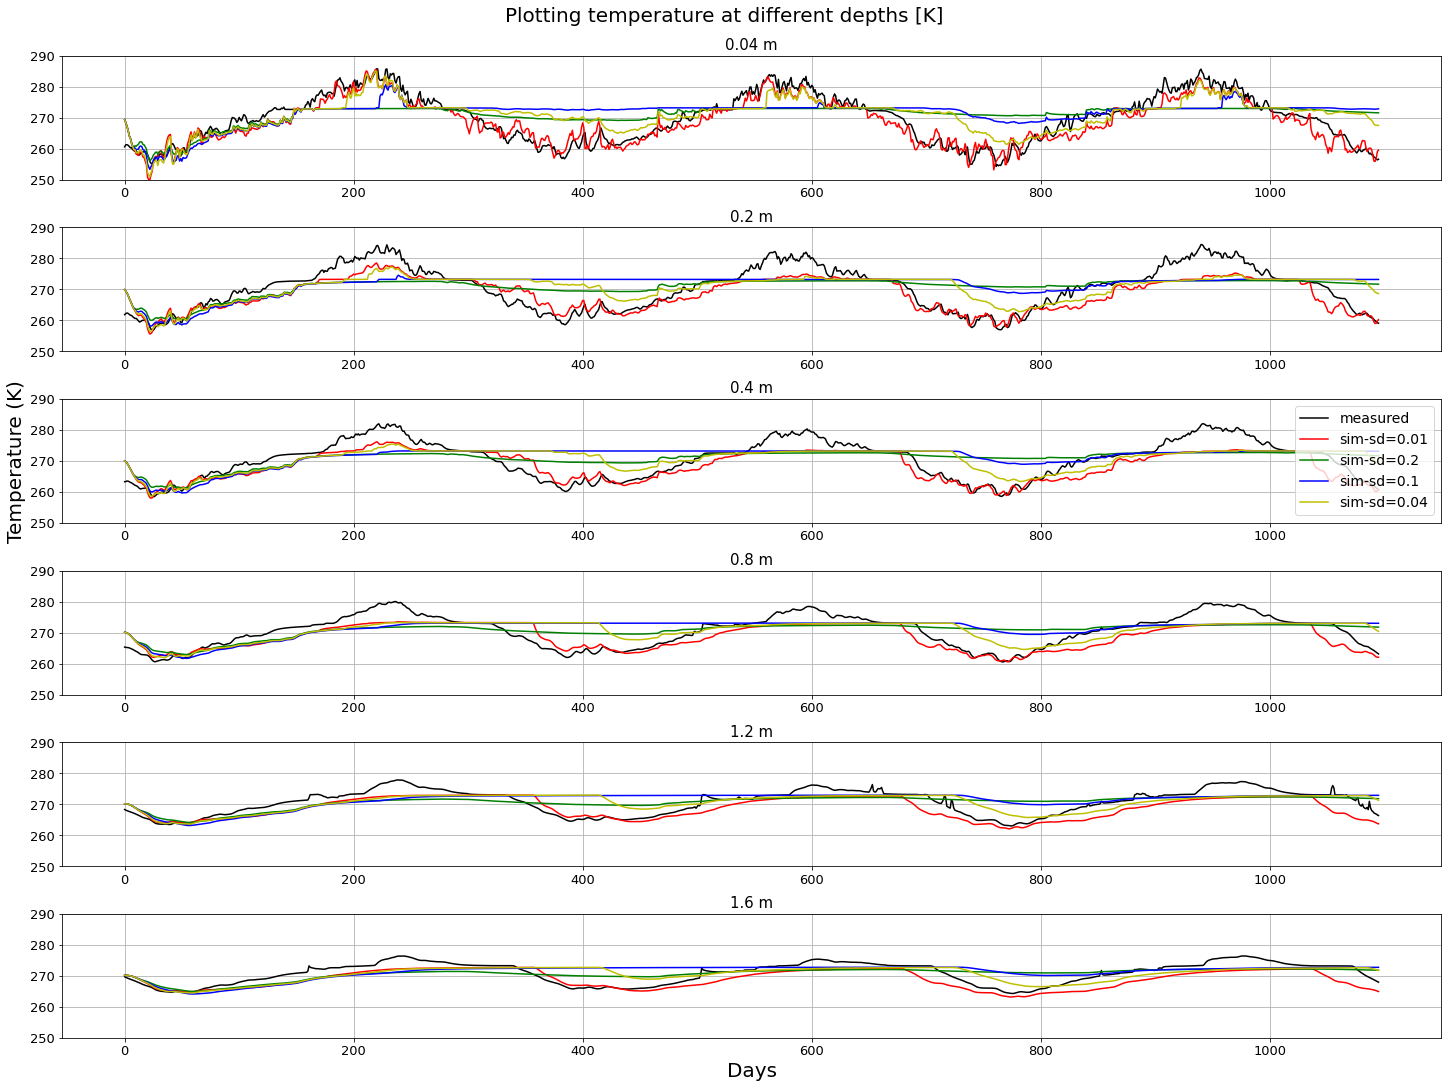

In [186]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd001[f'point -{depth} temperature [K]'][1:].values, 'r', label='sim-sd=0.01')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs[f'point -{depth} temperature [K]'][1:].values, 'g', label='sim-sd=0.2')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd01[f'point -{depth} temperature [K]'][1:].values, 'b', label='sim-sd=0.1')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd004[f'point -{depth} temperature [K]'][1:].values, 'y', label='sim-sd=0.04')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

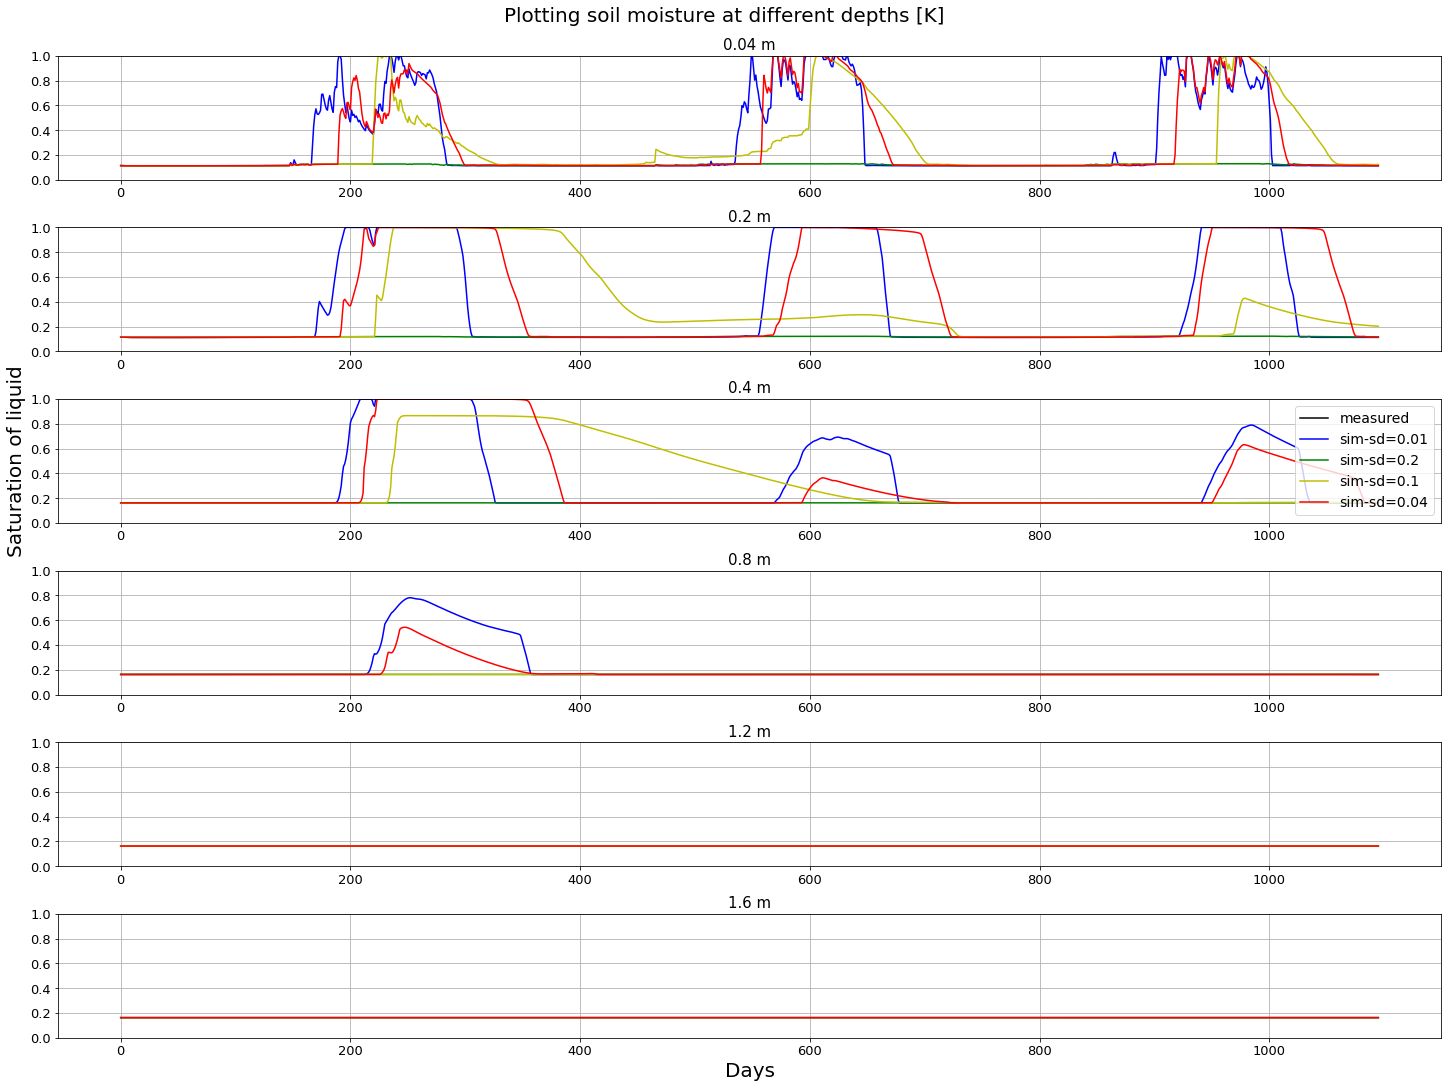

In [187]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,1096)
time_period = np.arange(0,1096)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd001[f'point -{depth} saturation liquid'][1:].values, 'b', label='sim-sd=0.01')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs[f'point -{depth} saturation liquid'][1:].values, 'g', label='sim-sd=0.2')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd01[f'point -{depth} saturation liquid'][1:].values, 'y', label='sim-sd=0.1')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, sim_data_3yrs_sd004[f'point -{depth} saturation liquid'][1:].values, 'r', label='sim-sd=0.04')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

## Solutions

In [23]:
def modeled(directory):
    obs_dir = os.path.join(directory, 'observation.dat')
    skiprows, header = obsRead.read_file(obs_dir)
    obs_data = np.loadtxt(obs_dir, delimiter=' ', skiprows=skiprows)
        
    time = np.arange(0,366)
    
    wc_surf,evaporation,thaw_depth,\
    T_surf,T_subp10,T_subp40,T_subp120,\
    sl_subp1,sl_subp3,sl_subp5,sl_subp10,\
    si_subp1,si_subp3,si_subp5,si_subp10\
    = (np.zeros((1,len(time))) for i in range(15))

    wc_surf     = obs_data[:,header.index('surface water content [mol]')]/55500*1000
    evaporation = obs_data[:,header.index('evaporation rate [m s^-1]')]*86400*1000
    thaw_depth  = obs_data[:,header.index('thaw depth [m]')]*100
        
    T_surf    = obs_data[:,header.index('surface temperature [K]')]
    T_subp10  = obs_data[:,header.index('point -0.1 temperature [K]')]
    T_subp40  = obs_data[:,header.index('point -0.4 temperature [K]')]
    T_subp120 = obs_data[:,header.index('point -1.2 temperature [K]')]
    
    sl_subp1  = obs_data[:,header.index('point -0.1 saturation liquid')]
    sl_subp3  = obs_data[:,header.index('point -0.4 saturation liquid')]
    sl_subp5  = obs_data[:,header.index('point -1.2 saturation liquid')]
    sl_subp10 = obs_data[:,header.index('point -1.6 saturation liquid')]
       
    si_subp1  = obs_data[:,header.index('point -0.1 saturation ice')]
    si_subp3  = obs_data[:,header.index('point -0.4 saturation ice')]
    si_subp5  = obs_data[:,header.index('point -0.8 saturation ice')]
    si_subp10 = obs_data[:,header.index('point -1.2 saturation ice')]
        
    # simulated results set
    simset = {}
    simset['surface water content (1e-3 m3)'] = wc_surf
    simset['evaporation (mm/d)']    = evaporation
    simset['thaw depth (cm)']       = thaw_depth
    simset['temperature (K)']       = [T_surf,T_subp10,T_subp40,T_subp120]
    simset['saturation liquid']     = [sl_subp1,sl_subp3,sl_subp5,sl_subp10]
    simset['saturation ice']        = [si_subp1,si_subp3,si_subp5,si_subp10]

    return simset

In [24]:
simset = modeled(directory)

In [25]:
def plot(simset,var,axs,label,fontsize=12):
    rcParams['xtick.labelsize'] = fontsize
    rcParams['ytick.labelsize'] = fontsize
    rcParams['axes.labelsize'] = fontsize
    
    time = np.arange(0,95)
    
    if type(simset[var]) is not list:
        axs.plot( simset[var],'k*')
    
    else:
        cmap = plt.get_cmap('viridis')
        colors = cmap(np.linspace(0,1,len(simset[var])))
        for i in range(4):
            axs.plot( simset[var][i],color=colors[i],label=label[i])
        axs.legend()
    
    axs.set_xticks(range(0,95,90))
    axs.set_xlabel('Time (day)',fontsize=fontsize)
    axs.set_ylabel(var.capitalize(),fontsize=fontsize)

### Checking out the results : Case5_III.demo

In [26]:
directory = 'Case5_III.demo'

In [27]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=219, step=1)

In [26]:
df_observation = obs.copy()

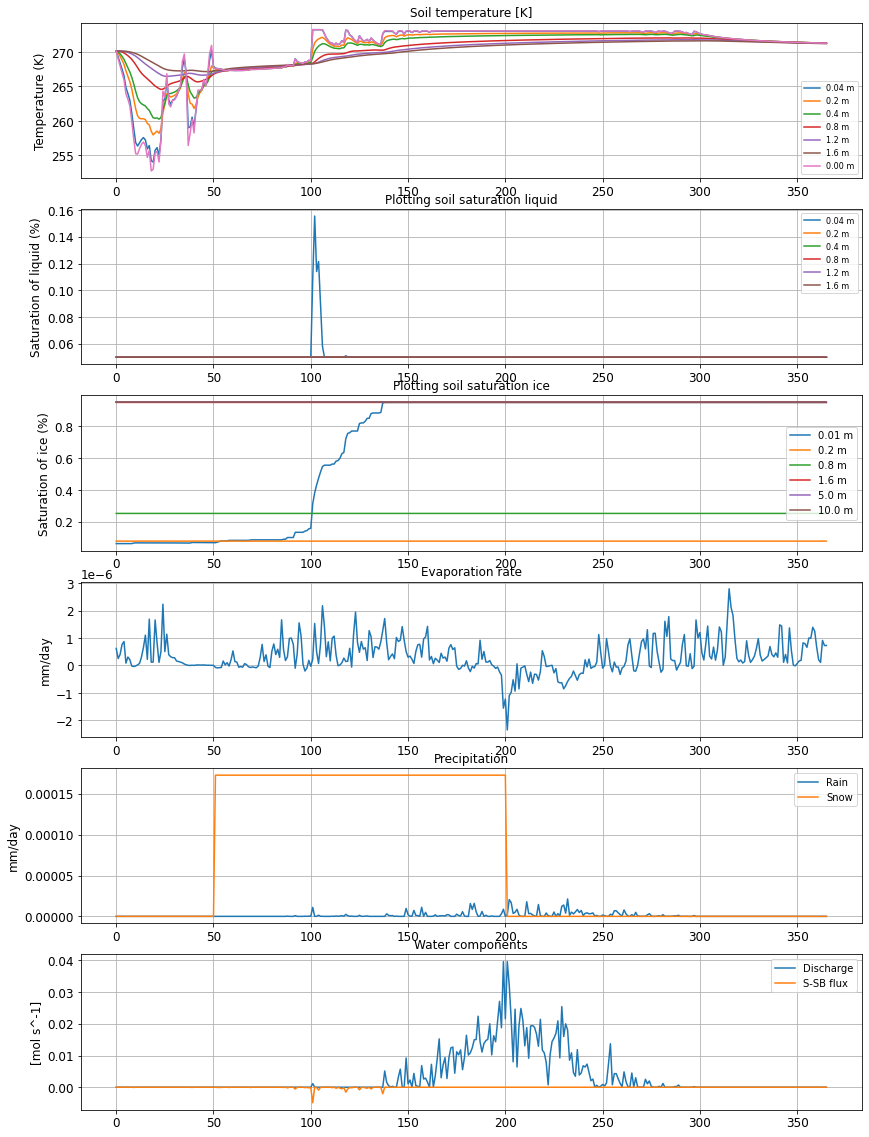

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [28]:
simset = modeled(directory)

## Plot solutions

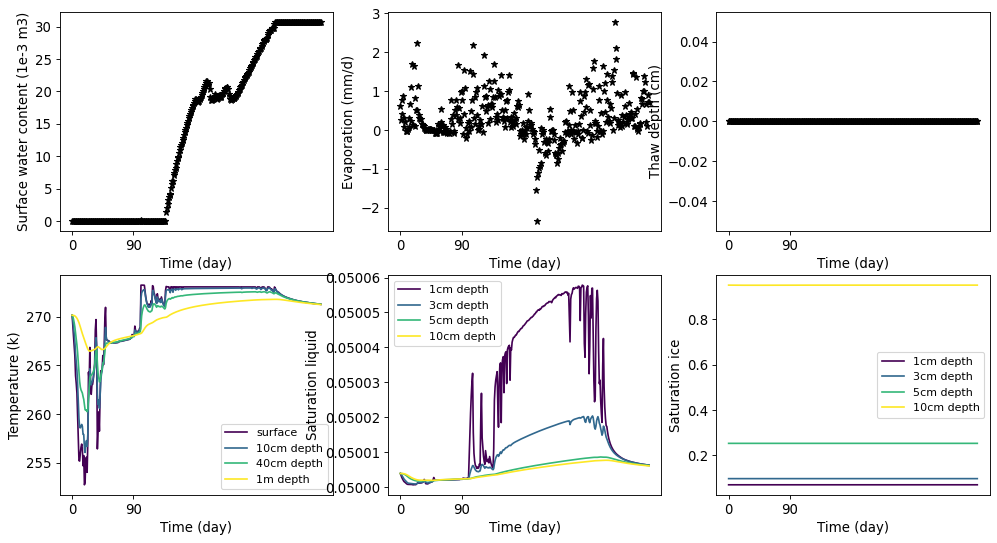

In [29]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

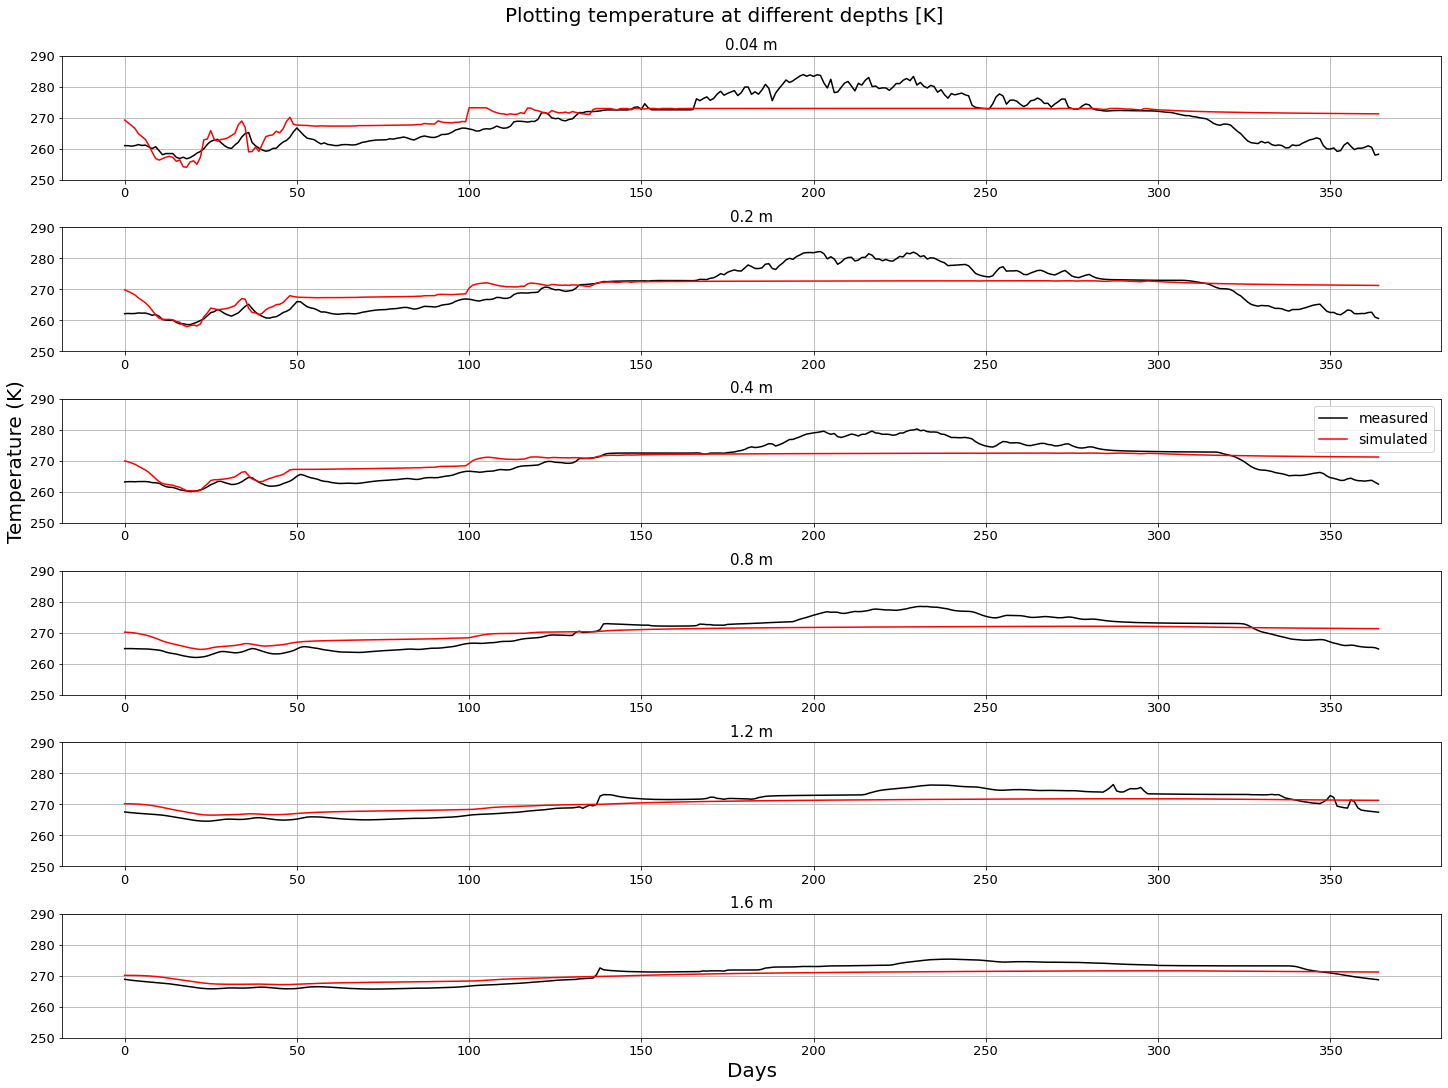

In [31]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

In [35]:
df_observation.index

RangeIndex(start=0, stop=366, step=1)

Text(0.5, 0, 'Days')

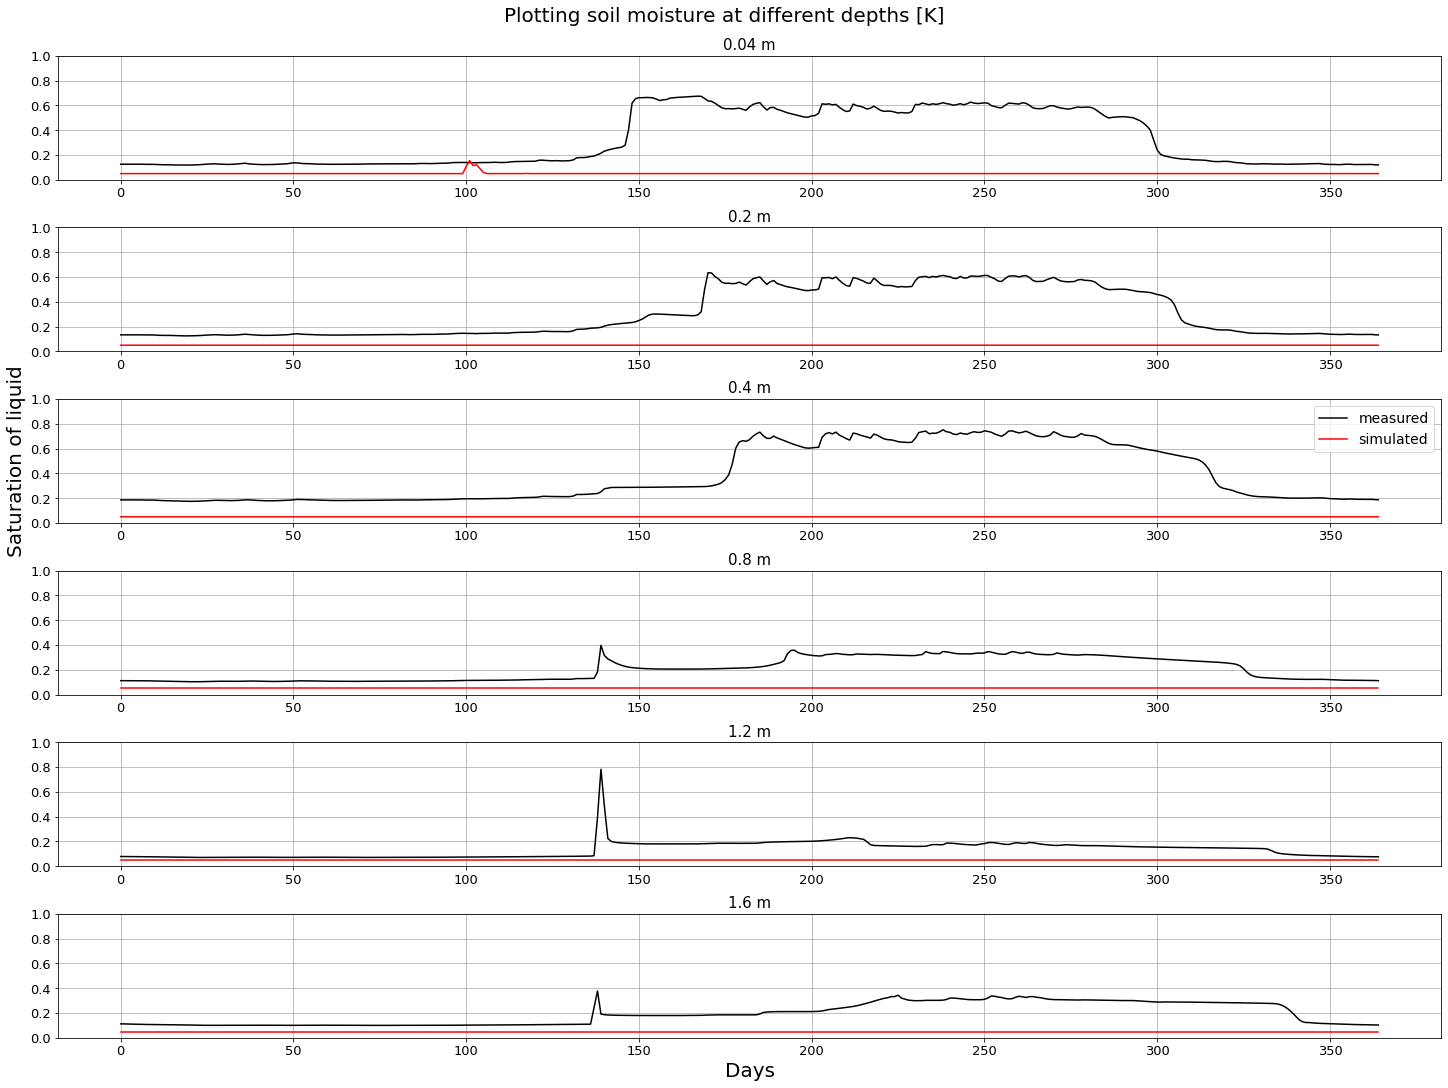

In [36]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III1.demo

In [37]:
directory = 'Case5_III1.demo'

In [38]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [39]:
df_observation = obs.copy()

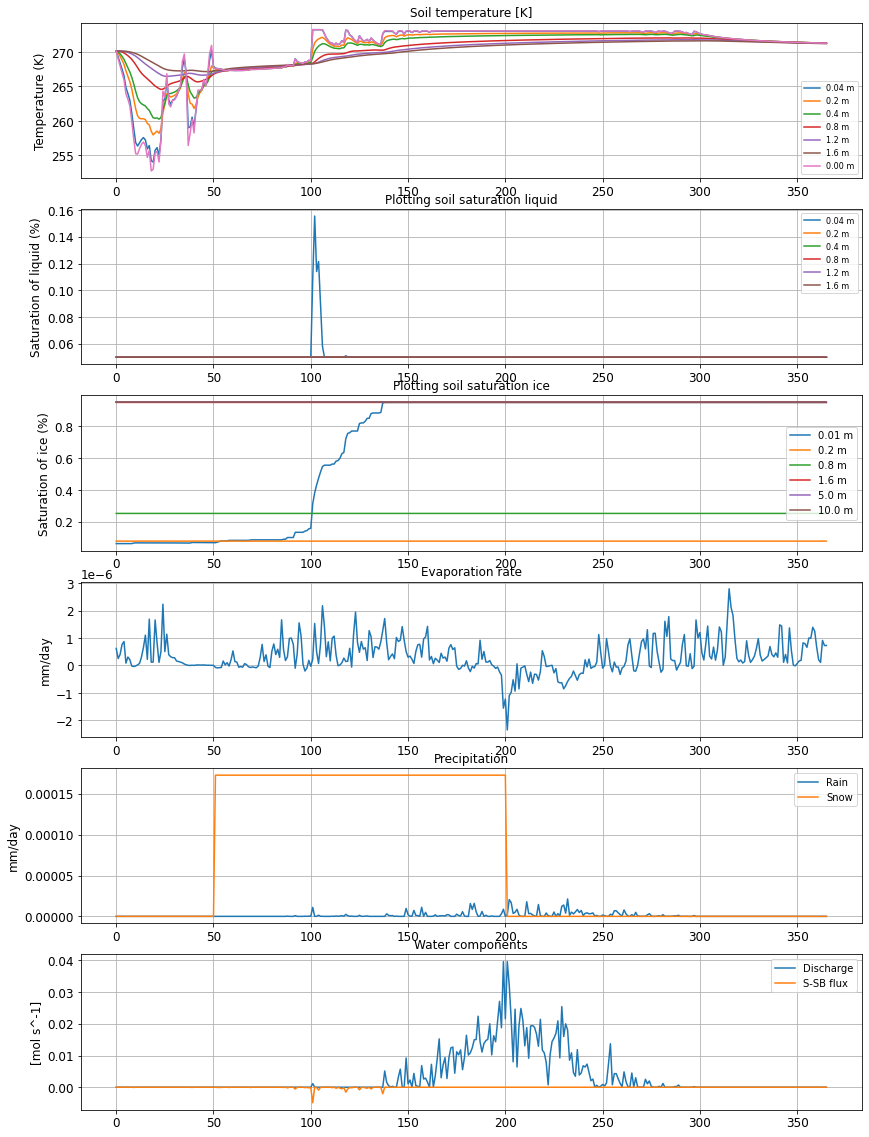

In [40]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [41]:
simset = modeled(directory)

## Plot solutions

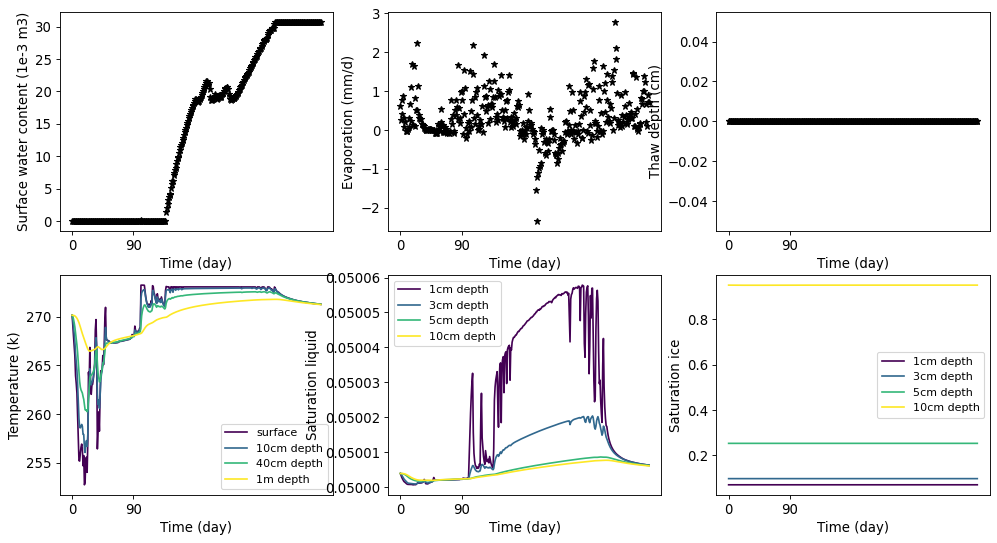

In [42]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

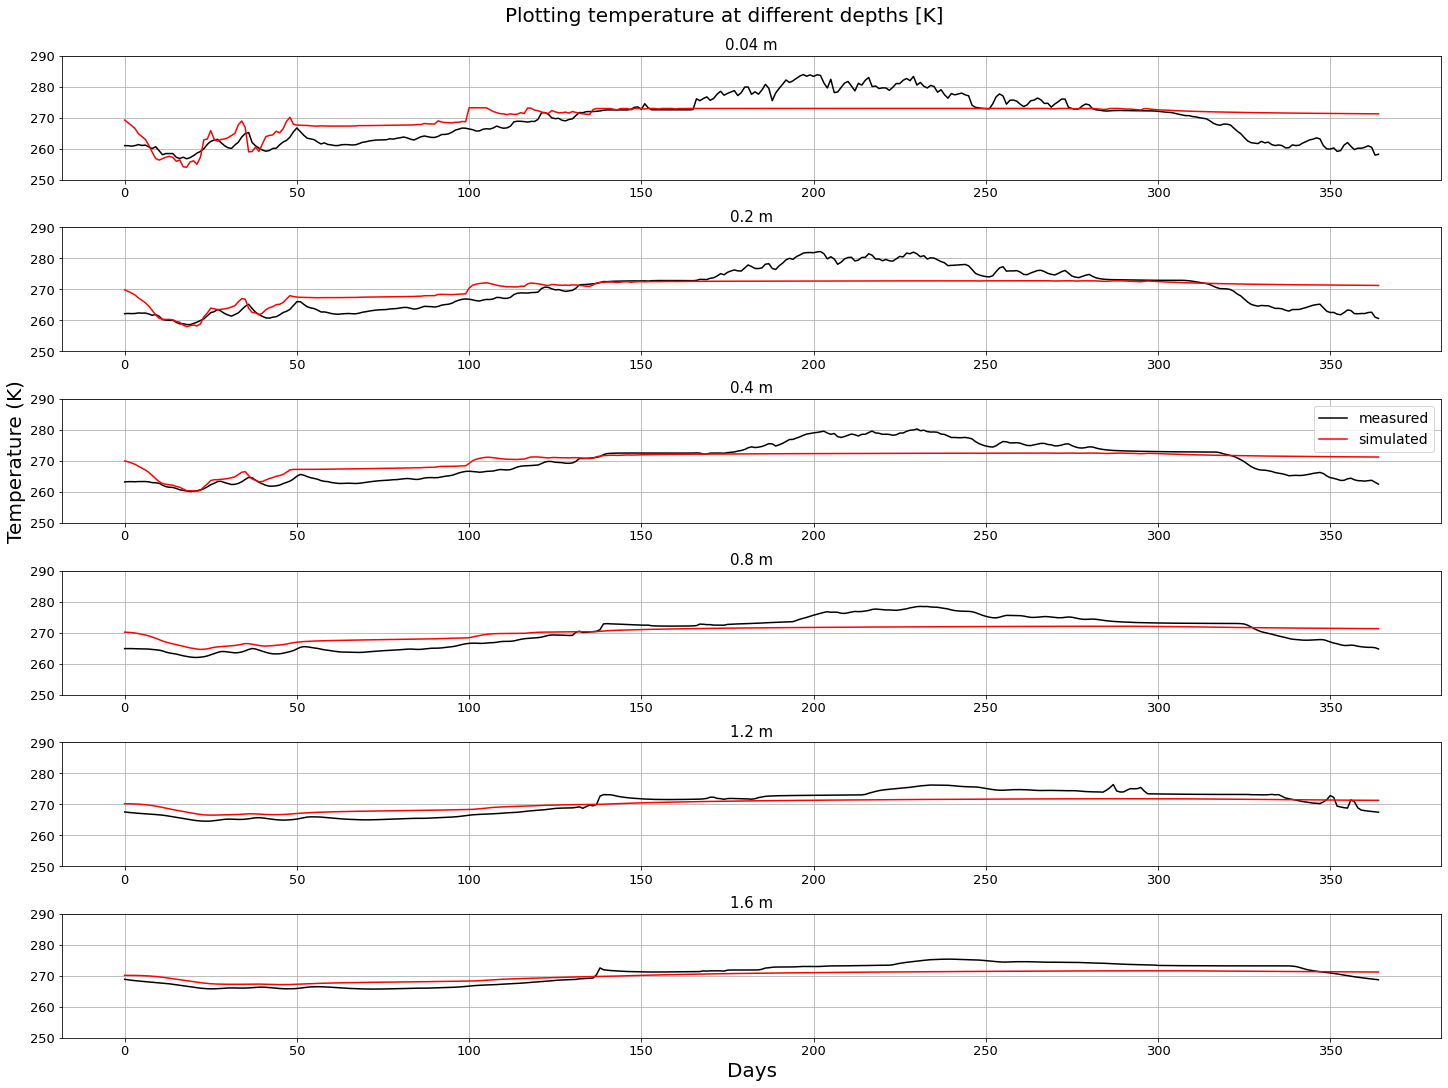

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

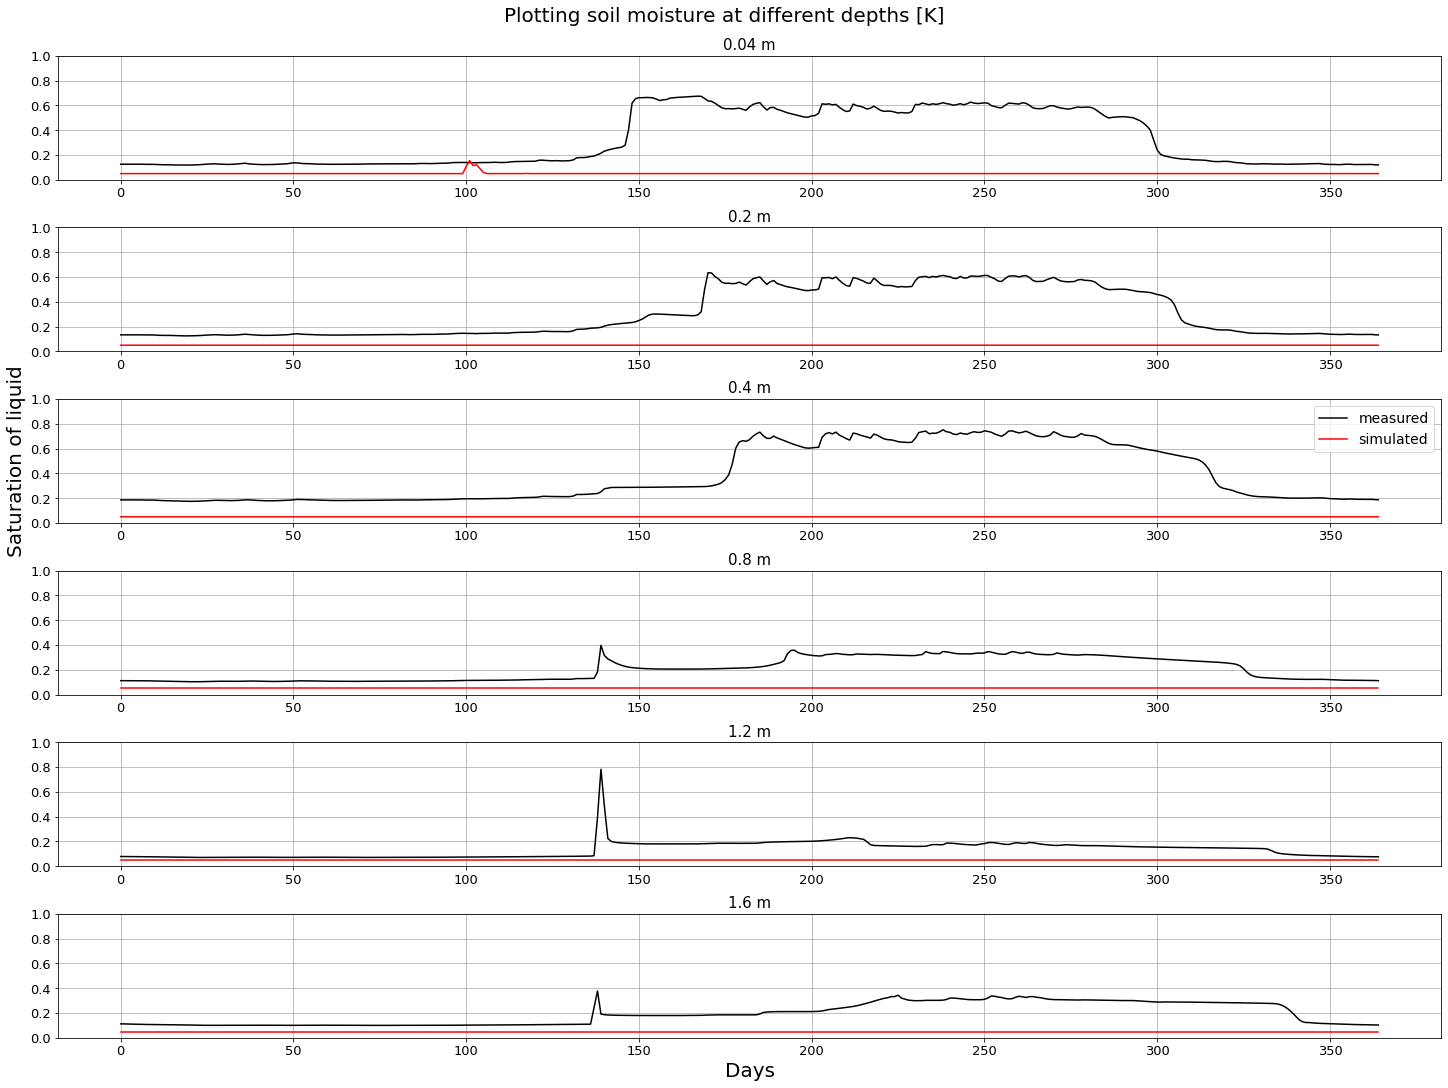

In [44]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

In [45]:
directory

'Case5_III1.demo'

### Extracting the ats output data:

In [46]:
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    ats_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        ats_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

ats_output.head()

base_porosity.cell.0 capillary_pressure_gas_liq.cell.0  \
0                    0                                 0   
1                  102                               102   
2                11105                             11105   
3                  112                               112   
4                11641                             11641   

  capillary_pressure_liq_ice.cell.0 cell_volume.cell.0 darcy_velocity.cell.0  \
0                                 0                  0                     0   
1                               102                102                   102   
2                             11105              11105                 11105   
3                               112                112                   112   
4                             11641              11641                 11641   

  darcy_velocity.cell.1 darcy_velocity.cell.2 density_rock.cell.0  \
0                     0                     0                   0   
1                   102                   102                 102   
2                 11105                 11105               11105   
3                   112                   112                 112   
4                 11641                 11641               11641   

  dwater_content|dtemperature.cell.0 energy.cell.0  ...  \
0                                  0             0  ...   
1                                102           102  ...   
2                              11105         11105  ...   
3                                112           112  ...   
4                              11641         11641  ...   

  relative_permeability.cell.0 saturation_gas.cell.0 saturation_ice.cell.0  \
0                            0                     0                     0   
1                          102                   102                   102   
2                        11105                 11105                 11105   
3                          112                   112                   112   
4                        11641                 11641                 11641   

  saturation_liquid.cell.0 temperature.cell.0 thermal_conductivity.cell.0  \
0                        0                  0                           0   
1                      102                102                         102   
2                    11105              11105                       11105   
3                      112                112                         112   
4                    11641              11641                       11641   

  total_energy_source.cell.0 viscosity_liquid.cell.0 water_content.cell.0  \
0                          0                       0                    0   
1                        102                     102                  102   
2                      11105                   11105                11105   
3                        112                     112                  112   
4                      11641                   11641                11641   

  water_source.cell.0  
0                   0  
1                 102  
2               11105  
3                 112  
4               11641  

[5 rows x 30 columns]

In [47]:
with h5py.File(f'{directory}/ats_vis_snow_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    snow_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        snow_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

snow_output.head()

snow-age.cell.0 snow-cell_volume.cell.0 snow-death_rate.cell.0  \
0               0                       0                      0   
1             102                     102                    102   
2           11105                   11105                  11105   
3             112                     112                    112   
4           11641                   11641                  11641   

  snow-density.cell.0 snow-depth.cell.0 snow-melt.cell.0  \
0                   0                 0                0   
1                 102               102              102   
2               11105             11105            11105   
3                 112               112              112   
4               11641             11641            11641   

  snow-precipitation.cell.0 snow-source.cell.0 snow-source_sink.cell.0  \
0                         0                  0                       0   
1                       102                102                     102   
2                     11105              11105                   11105   
3                       112                112                     112   
4                     11641              11641                   11641   

  snow-temperature.cell.0 snow-water_equivalent.cell.0  
0                       0                            0  
1                     102                          102  
2                   11105                        11105  
3                     112                          112  
4                   11641                        11641

In [48]:
directory

'Case5_III1.demo'

In [49]:
with h5py.File(f'{directory}/ats_vis_surface_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    surface_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        surface_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

surface_output.head()

surface-air_temperature.cell.0 surface-albedo.cell.0 surface-albedos.cell.0  \
0                              0                     0                      0   
1                            102                   102                    102   
2                          11105                 11105                  11105   
3                            112                   112                    112   
4                          11641                 11641                  11641   

  surface-albedos.cell.1 surface-albedos.cell.2 surface-area_fractions.cell.0  \
0                      0                      0                             0   
1                    102                    102                           102   
2                  11105                  11105                         11105   
3                    112                    112                           112   
4                  11641                  11641                         11641   

  surface-area_fractions.cell.1 surface-area_fractions.cell.2  \
0                             0                             0   
1                           102                           102   
2                         11105                         11105   
3                           112                           112   
4                         11641                         11641   

  surface-aspect.cell.0 surface-cell_volume.cell.0  ...  \
0                     0                          0  ...   
1                   102                        102  ...   
2                 11105                      11105  ...   
3                   112                        112  ...   
4                 11641                      11641  ...   

  surface-unfrozen_effective_depth.cell.0 surface-unfrozen_fraction.cell.0  \
0                                       0                                0   
1                                     102                              102   
2                                   11105                            11105   
3                                     112                              112   
4                                   11641                            11641   

  surface-velocity.cell.0 surface-velocity.cell.1 surface-velocity.cell.2  \
0                       0                       0                       0   
1                     102                     102                     102   
2                   11105                   11105                   11105   
3                     112                     112                     112   
4                   11641                   11641                   11641   

  surface-water_content.cell.0 surface-water_content_bar.cell.0  \
0                            0                                0   
1                          102                              102   
2                        11105                            11105   
3                          112                              112   
4                        11641                            11641   

  surface-water_source.cell.0 surface-water_table_depth.cell.0  \
0                           0                                0   
1                         102                              102   
2                       11105                            11105   
3                         112                              112   
4                       11641                            11641   

  surface-wind_speed.cell.0  
0                         0  
1                       102  
2                     11105  
3                       112  
4                     11641  

[5 rows x 55 columns]

In [50]:
surface_output.columns

Index(['surface-air_temperature.cell.0', 'surface-albedo.cell.0',
       'surface-albedos.cell.0', 'surface-albedos.cell.1',
       'surface-albedos.cell.2', 'surface-area_fractions.cell.0',
       'surface-area_fractions.cell.1', 'surface-area_fractions.cell.2',
       'surface-aspect.cell.0', 'surface-cell_volume.cell.0',
       'surface-elevation.cell.0', 'surface-emissivities.cell.0',
       'surface-emissivities.cell.1', 'surface-emissivities.cell.2',
       'surface-energy.cell.0', 'surface-enthalpy.cell.0',
       'surface-evaporative_flux.cell.0',
       'surface-incoming_longwave_radiation.cell.0',
       'surface-incoming_shortwave_radiation.cell.0',
       'surface-internal_energy_ice.cell.0',
       'surface-internal_energy_liquid.cell.0',
       'surface-manning_coefficient.cell.0',
       'surface-mass_density_liquid.cell.0',
       'surface-molar_density_liquid.cell.0',
       'surface-overland_conductivity.cell.0', 'surface-ponded_depth.cell.0',
       'surface-ponded_d

### Checking out the results : Case5_III2.demo

In [51]:
directory = 'Case5_III2.demo'

In [52]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [53]:
df_observation = obs.copy()

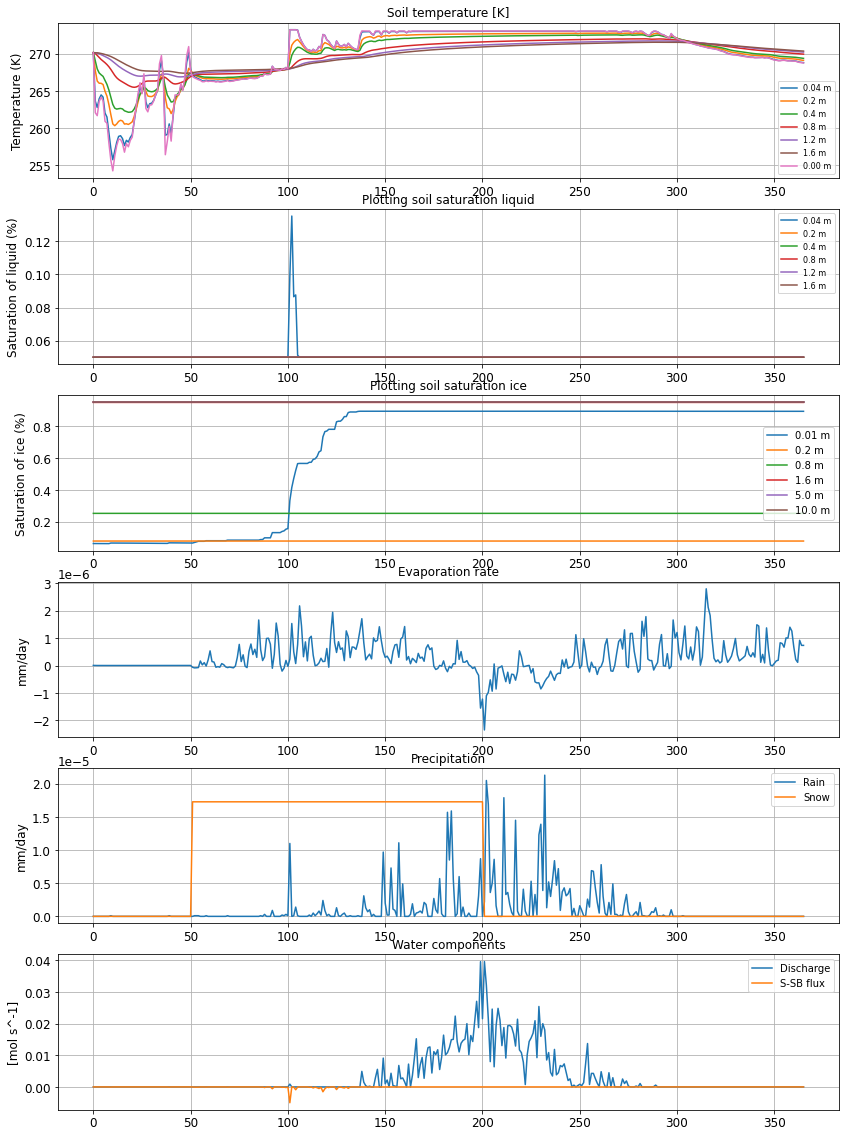

In [54]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [55]:
simset = modeled(directory)

## Plot solutions

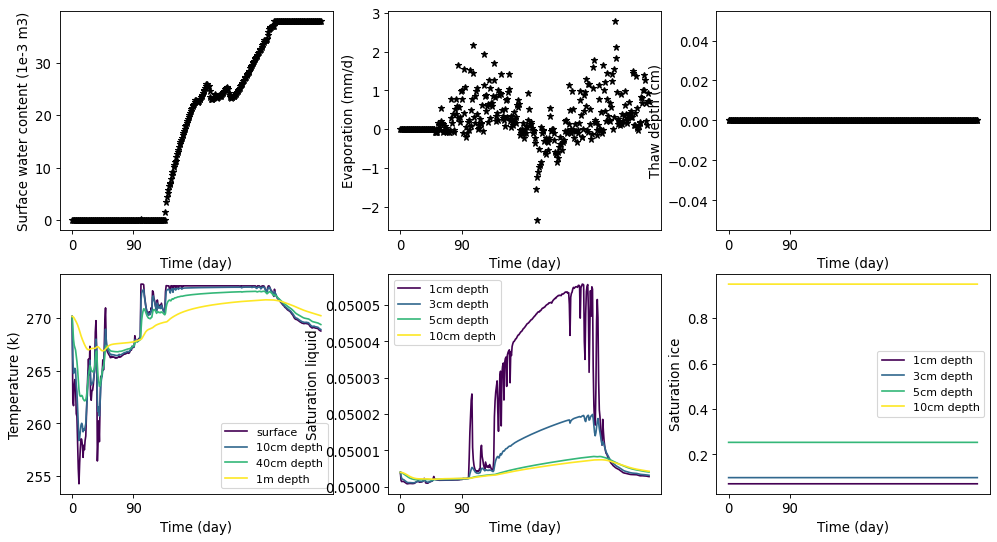

In [56]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

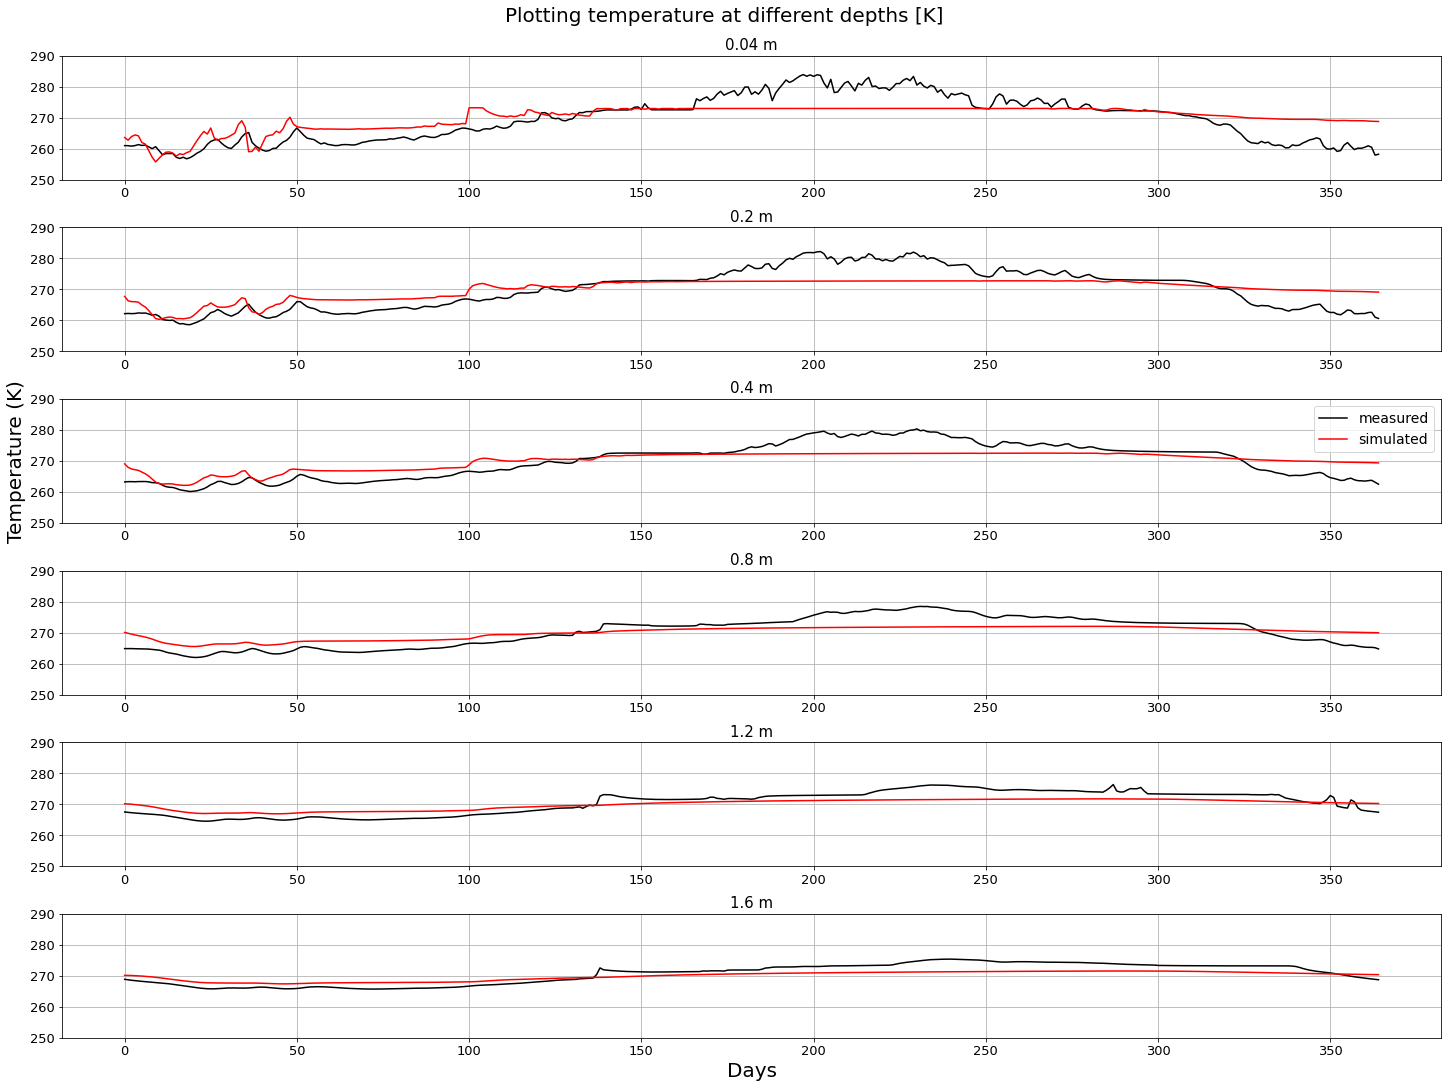

In [57]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

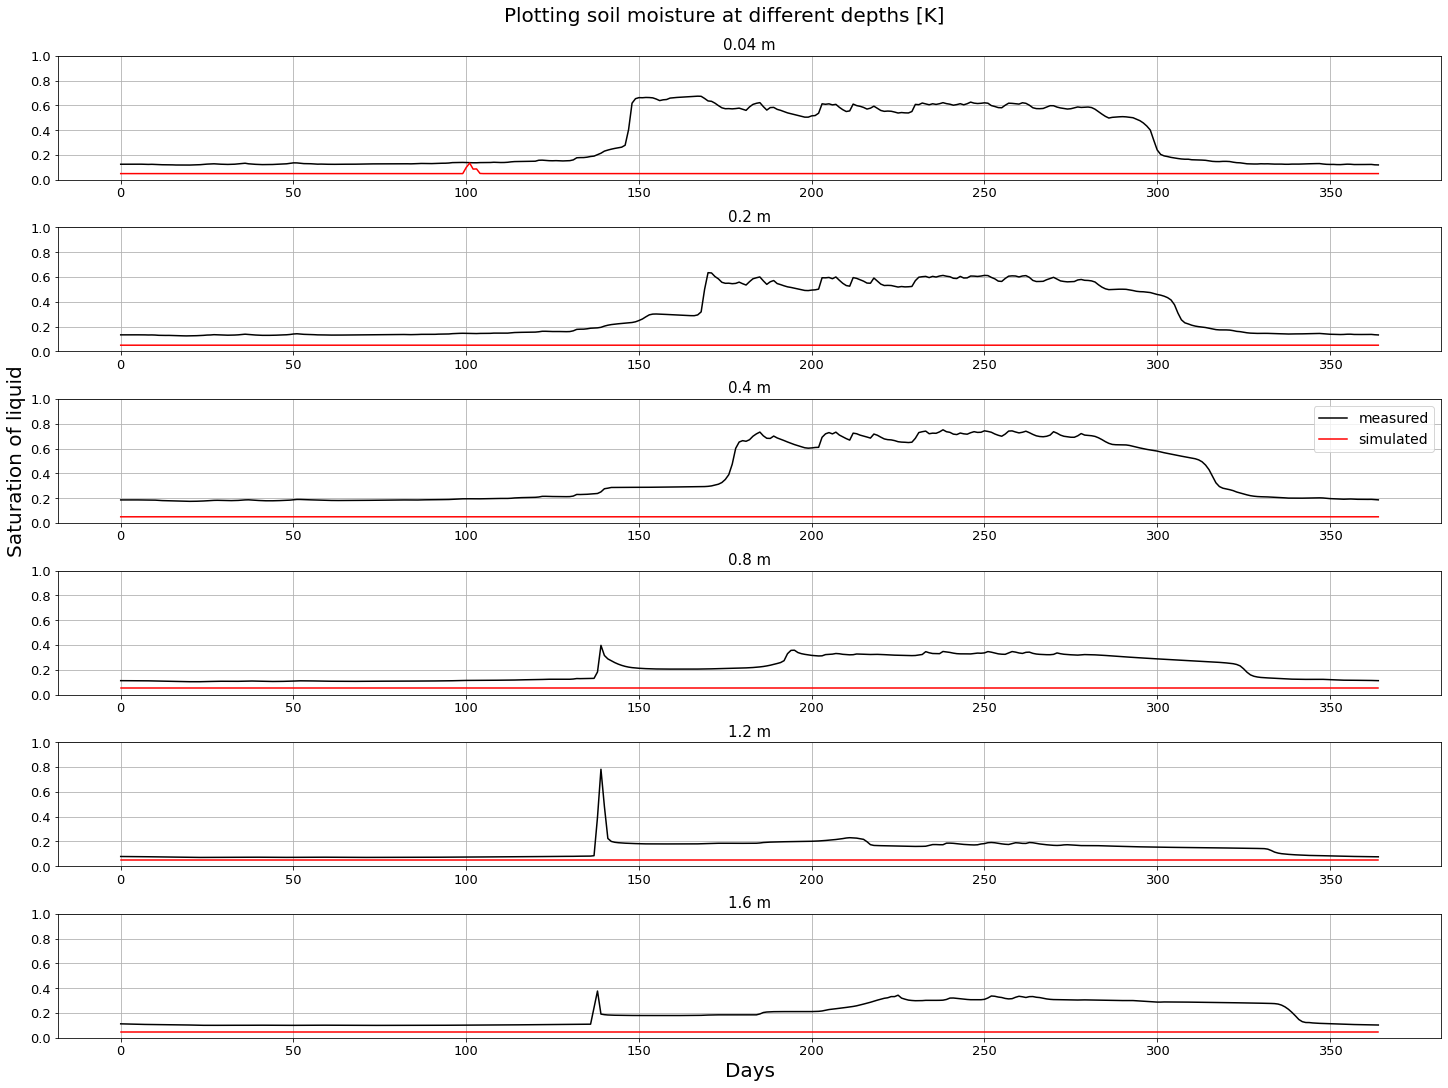

In [58]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III3.demo

In [59]:
directory = 'Case5_III3.demo'

In [60]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [61]:
df_observation = obs.copy()

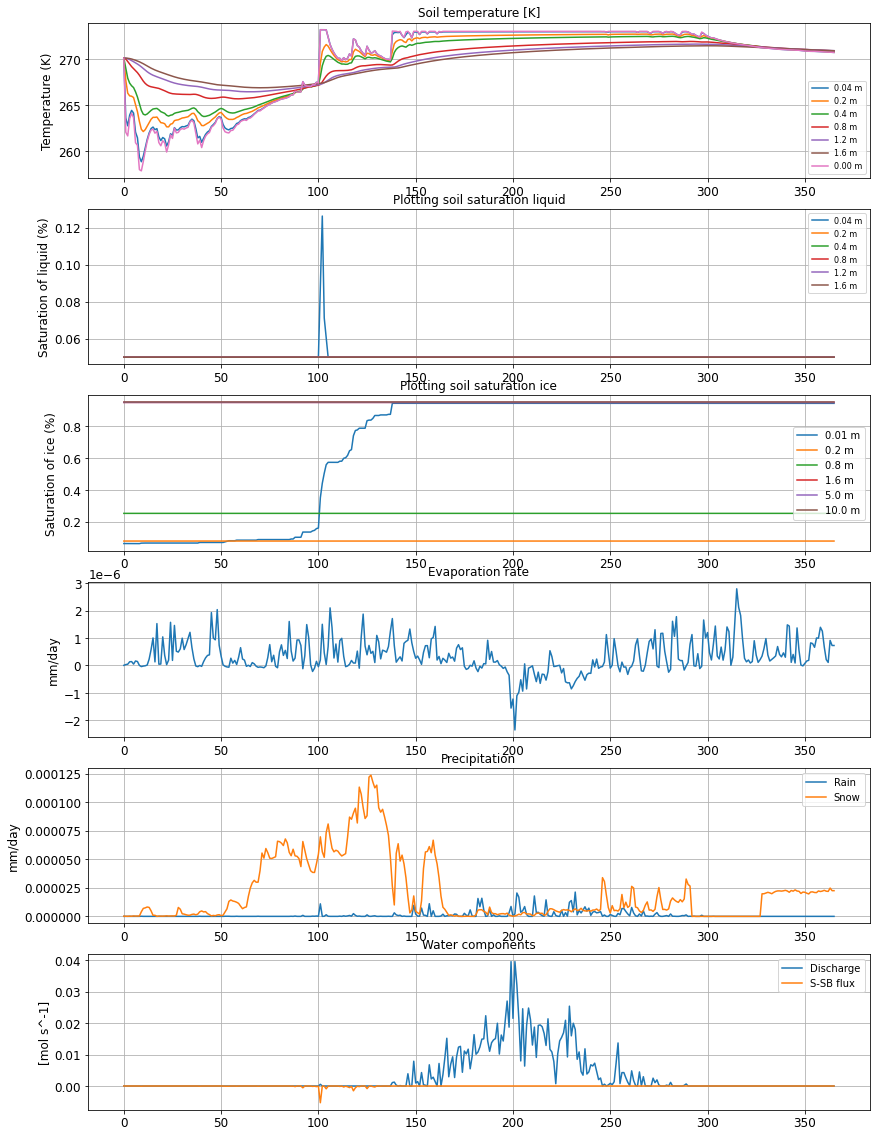

In [62]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [63]:
simset = modeled(directory)

## Plot solutions

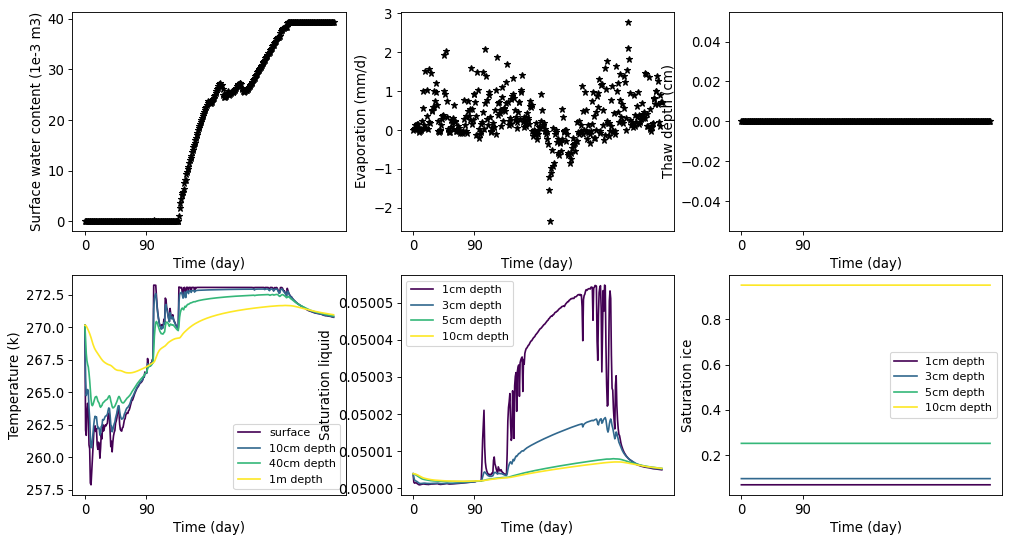

In [65]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

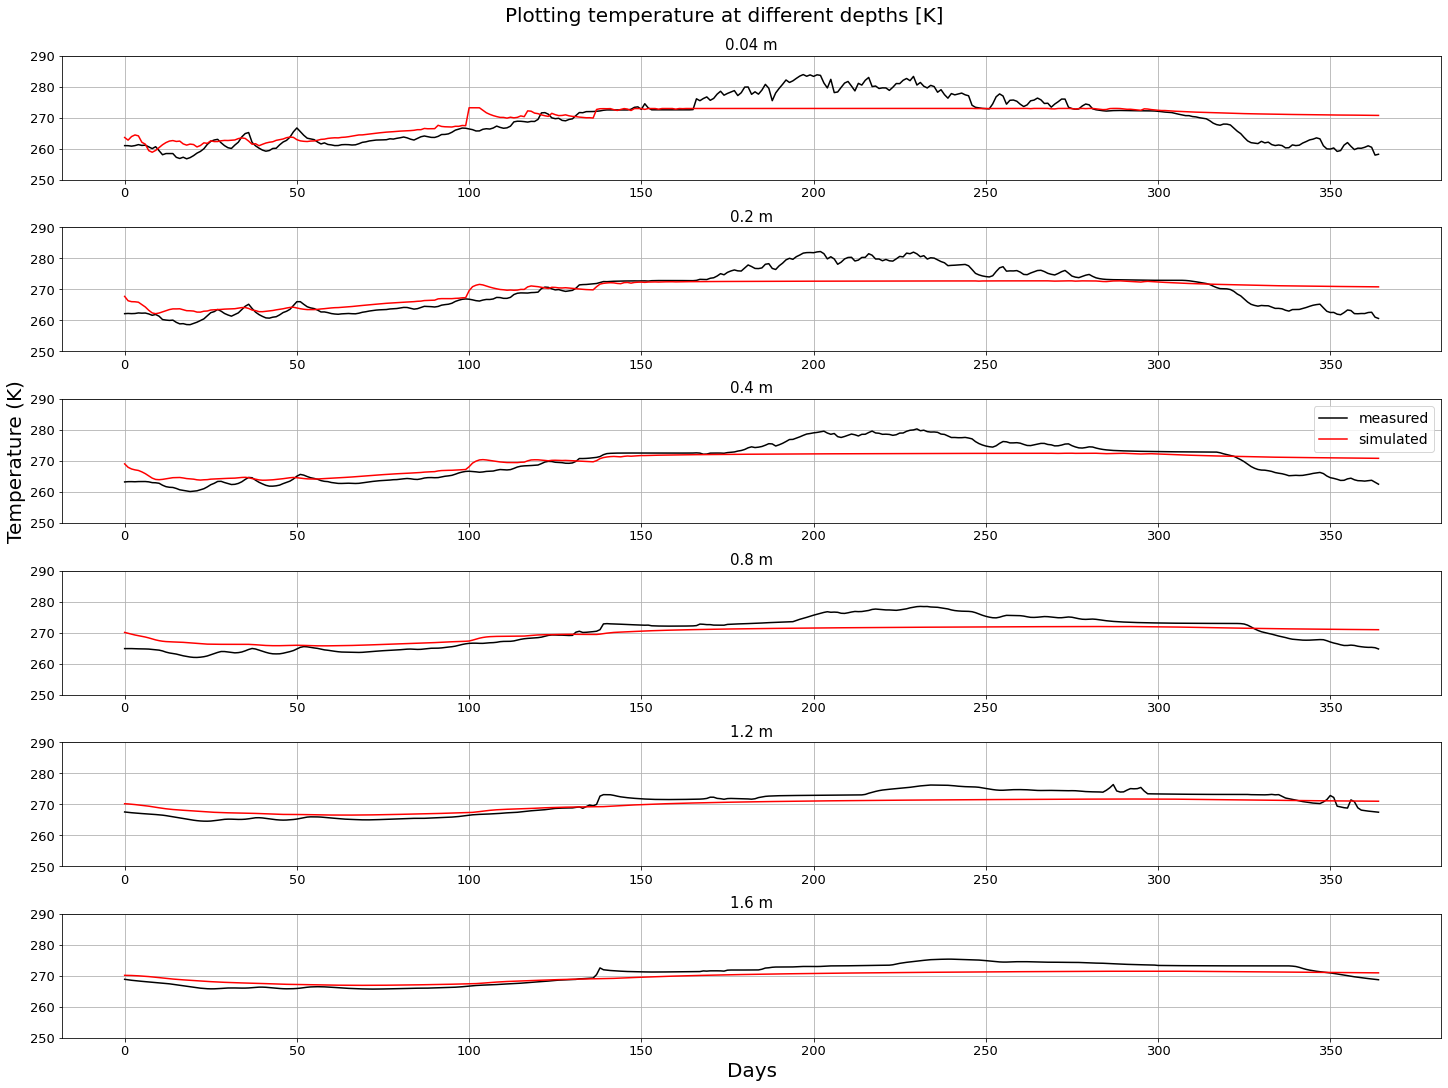

In [66]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

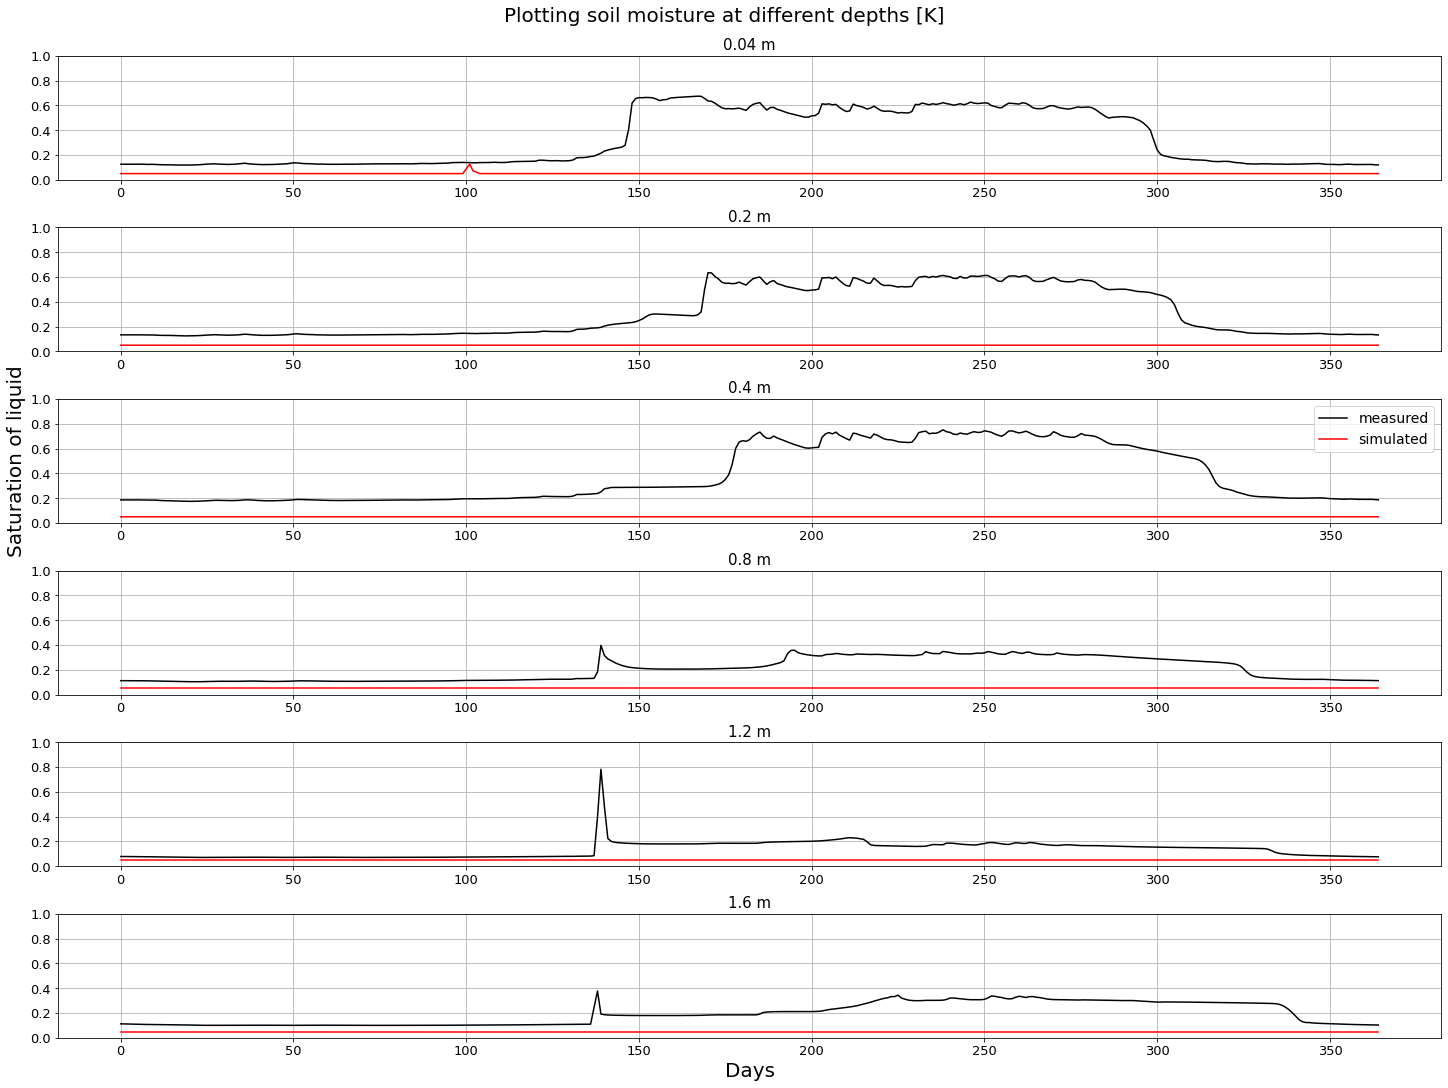

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III_B.demo (With data - long wave radiation)

In [36]:
directory = 'Case5_III_B.demo'

In [37]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=316,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [38]:
df_observation = obs.copy()

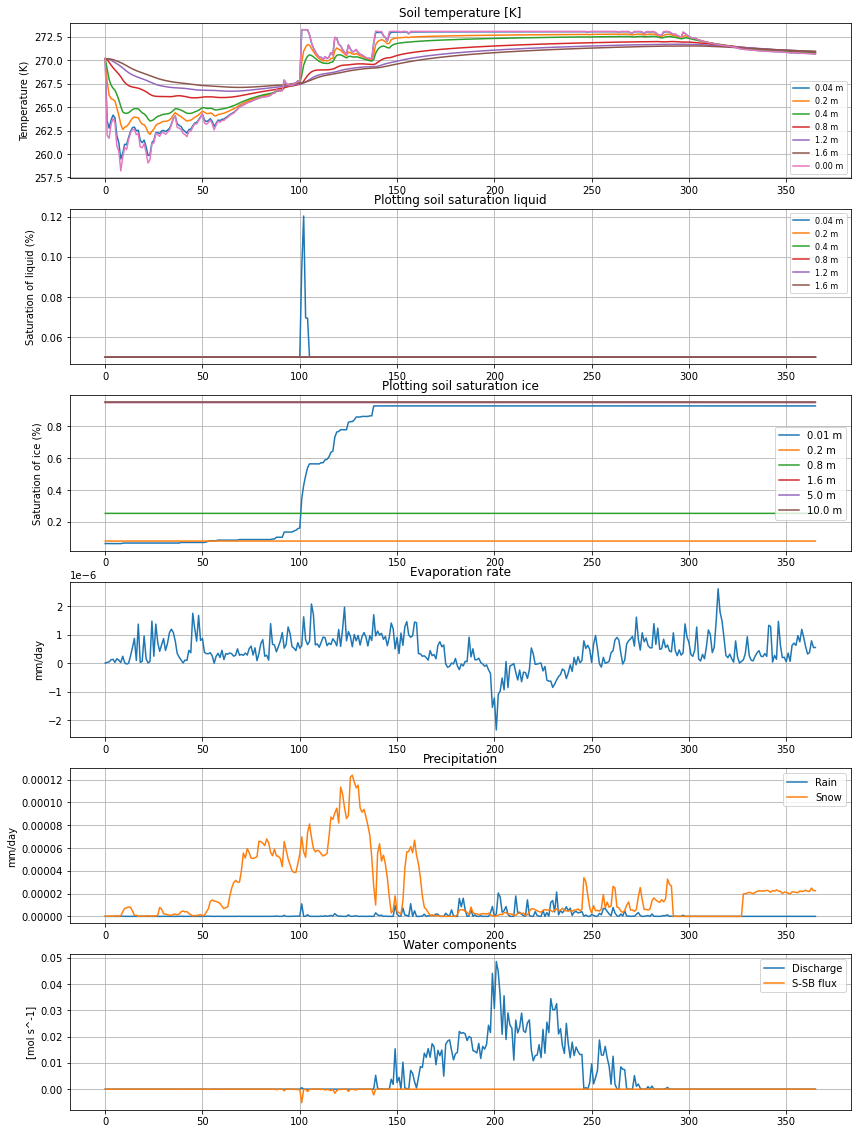

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [40]:
simset = modeled(directory)

## Plot solutions

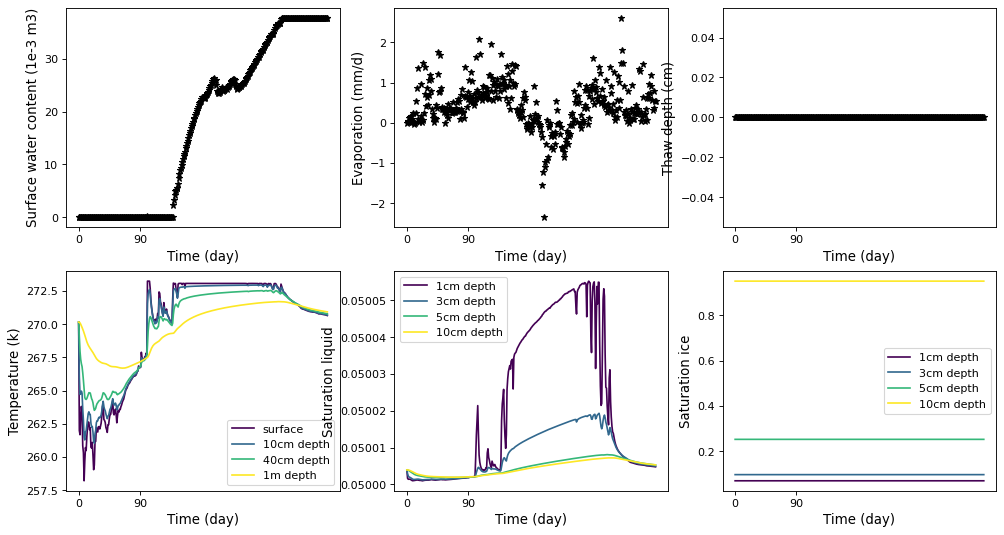

In [41]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

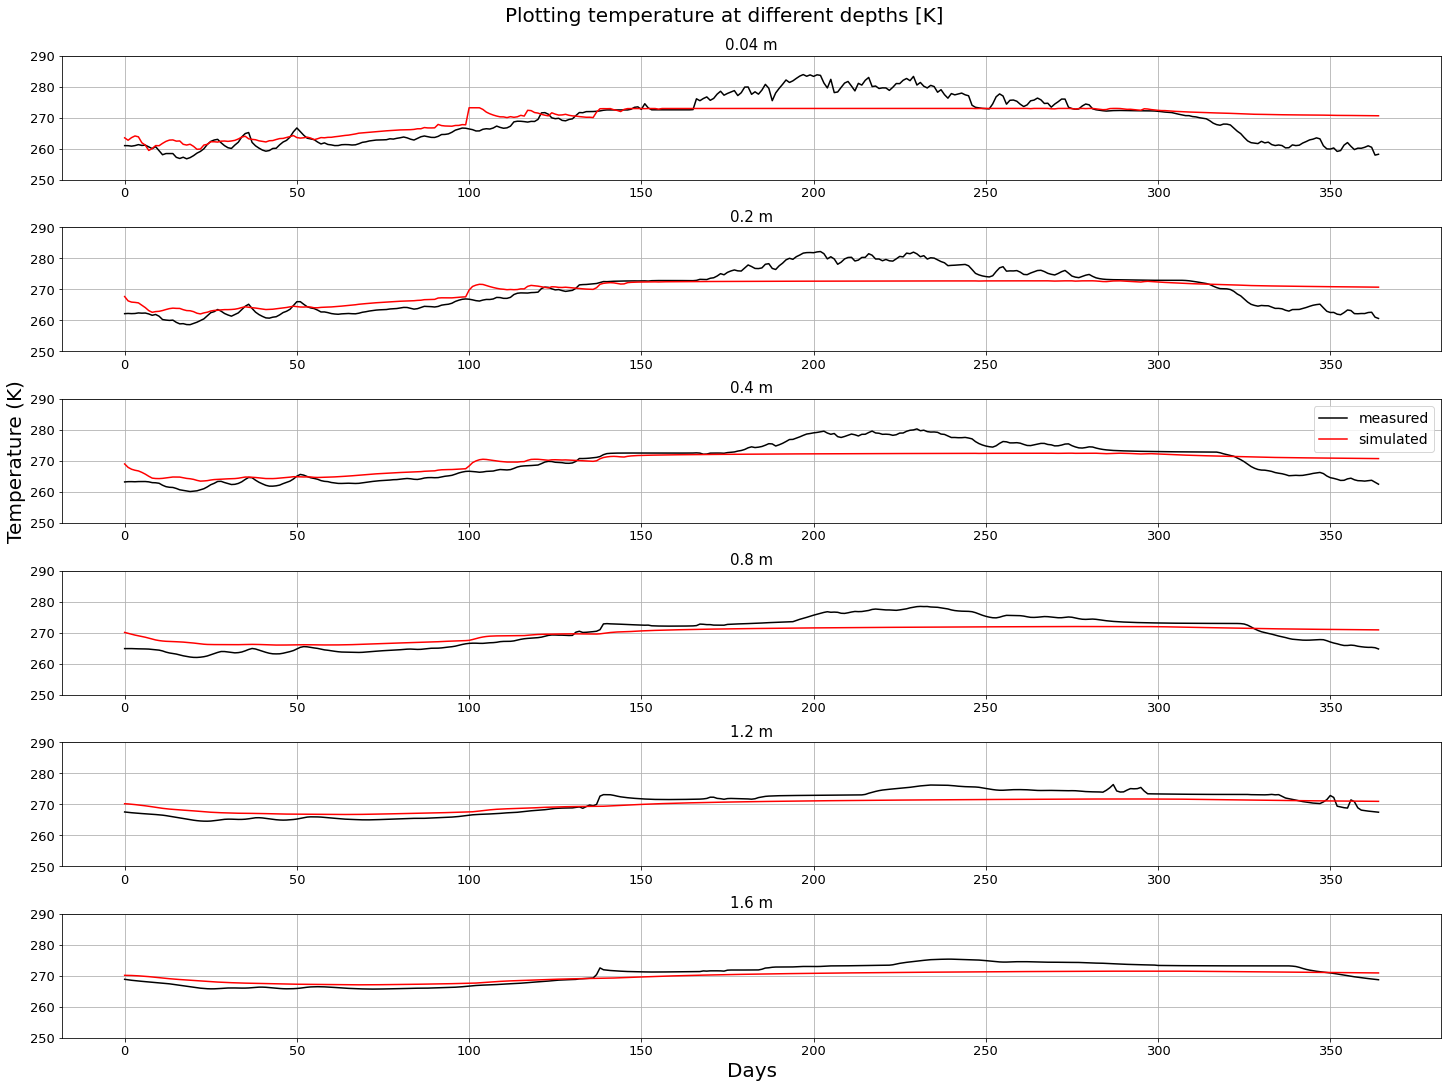

In [42]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

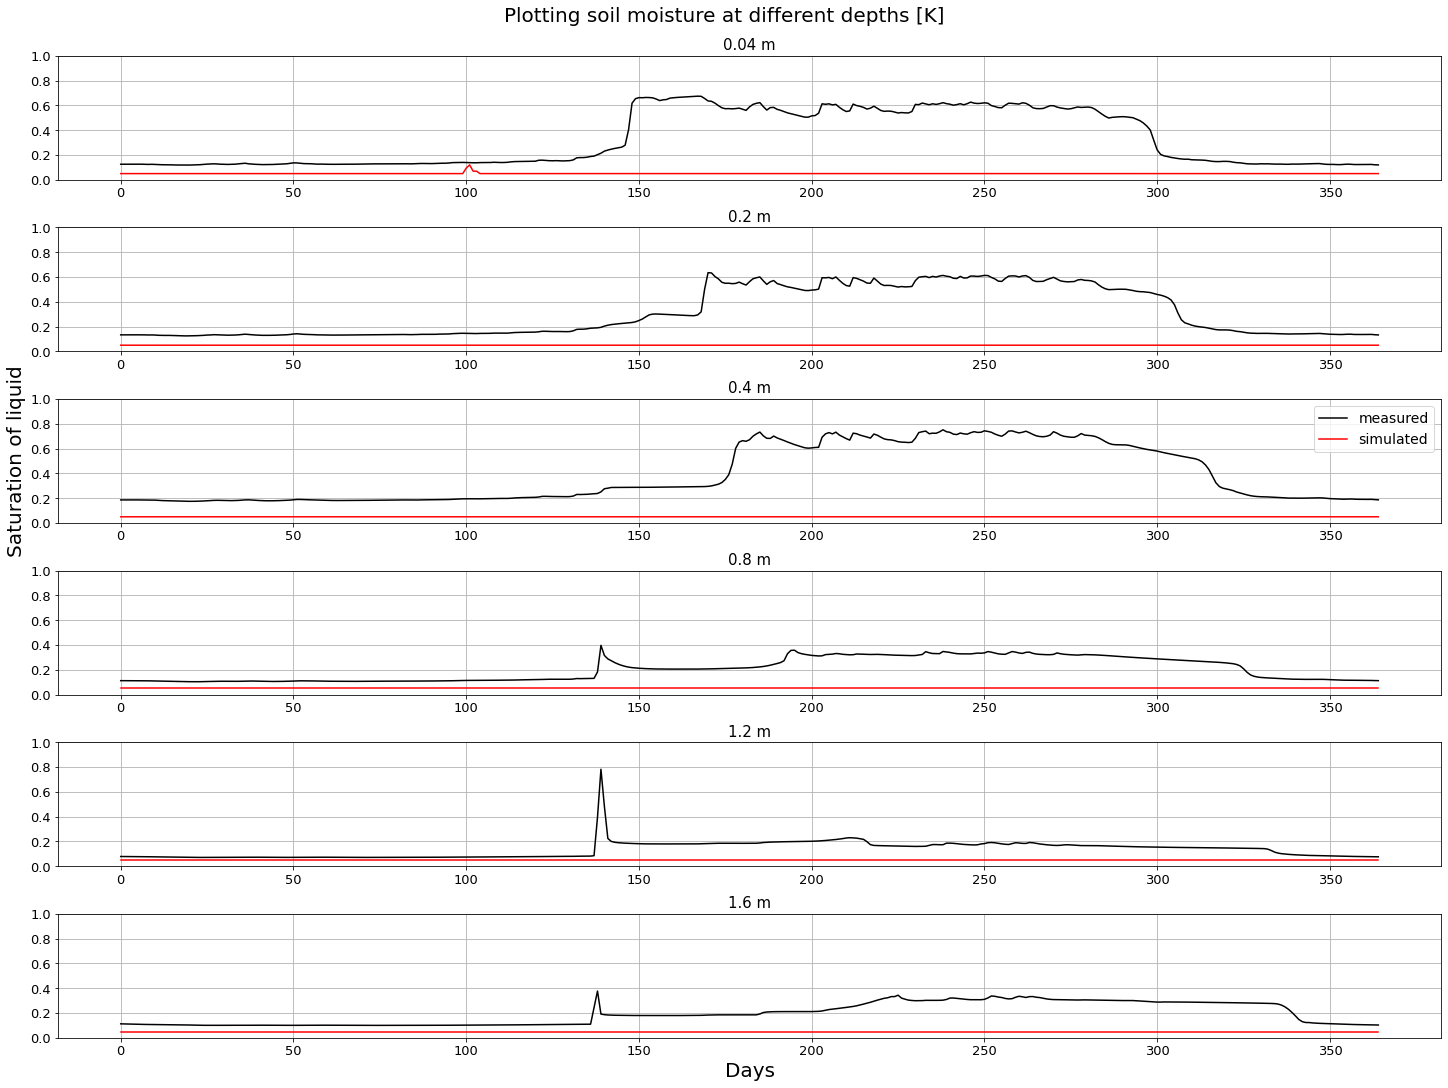

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Plotting other parameters:

In [45]:
df_observation.columns

Index(['time [s]', 'water content [mol]', 'surface water content [mol]',
       'snow water equivalent [mol]', 'evaporation rate [m s^-1]',
       'discharge [mol s^-1]', 'surface-subsurface flux [mol s^-1]',
       'precipitation rain [m s^-1]', 'precipitation snow [m s^-1]',
       'snow melt [m s^-1]', 'thaw depth [m]', 'water table depth [m]',
       'surface temperature [K]', 'surface albedo [-]',
       'surface-qE_latent_heat', 'surface-qE_lw_out',
       'surface-qE_sensible_heat', 'surface-ponded_depth [m]',
       'surface-incoming_longwave_radiation',
       'surface-incoming_shortwave_radiation', 'point -0.01 temperature [K]',
       'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -

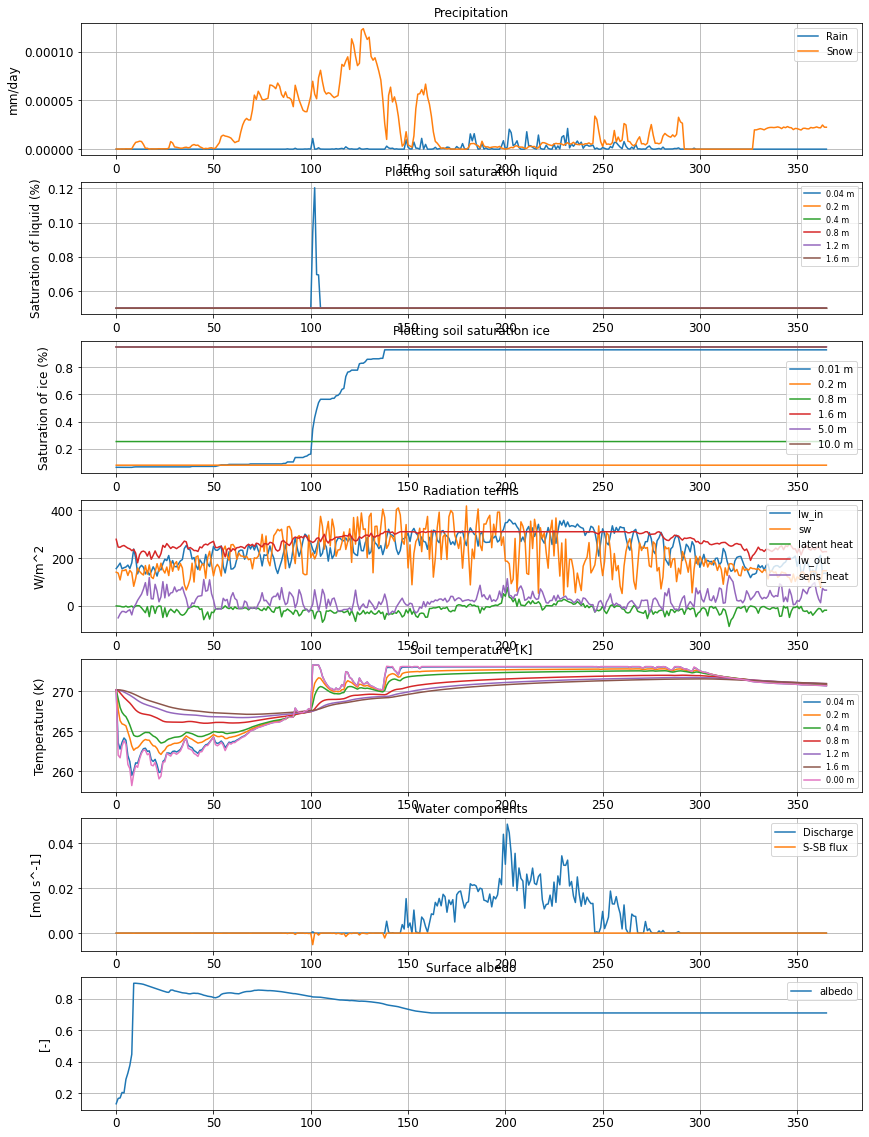

In [56]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax5.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Precipitation')
ax1.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax1.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax1.set_ylabel('mm/day')
ax1.legend()
ax1.grid(True)




ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Radiation terms')
ax4.plot(df_observation['surface-incoming_longwave_radiation'],label='lw_in')
ax4.plot(df_observation['surface-incoming_shortwave_radiation'],label='sw')
ax4.plot(df_observation['surface-qE_latent_heat'],label='latent heat')
ax4.plot(df_observation['surface-qE_lw_out'],label='lw_out')
ax4.plot(df_observation['surface-qE_sensible_heat'][1:],label='sens_heat')

#'surface-qE_latent_heat', 'surface-qE_lw_out',
#       'surface-qE_sensible_heat'
ax4.set_ylabel('W/m^2')
ax4.legend()
ax4.grid(True)

ax5.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax5.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax5.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax5.legend(fontsize=8)
ax5.grid(True)


ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

ax7.set_title('Surface albedo')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
#ax7.plot(df_observation['water table depth [m]'],label='surface water table depth')
#ax7.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax7.plot(df_observation['surface albedo [-]'],label='albedo')
ax7.set_ylabel('[-]')
ax7.legend()
ax7.grid(True)